In [25]:
#Borrar los datos del entorno
rm(list=ls())

#Paquetería

#Se utiliza pacman para instalar y cargar paquetes
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,srvyr,googledrive,janitor,survey,googlesheets4,
               ggwordcloud,
               stringdist,
               stopwords,
               gt,
               tm,
               tidytext,
               magick,
               showtext,openxlsx)
#Fuente para los gráficos
font_add_google("Poppins", "pop")
showtext_auto()

In [61]:
#Paleta gráficos cuarta transformación de la vida pública de México
paleta<-c("#9f2241","#235b4e","#bc955c","#98989a", "orange","violet")

In [27]:
#Función para crear tabla
crea_tabla <- function(df, titulo, subtitulo,nota="",nombre_archivo){

  # Format the numeric columns with commas
  formatted_df <- df #%>%
    #mutate(across(where(is.numeric), ~scales::comma(.)))

  # Checa si existe la columna "Organismo" para agrupar la tabla
  if("Organismo" %in% names(df)) {
    gt_table <- formatted_df %>%
      gt(rowname_col = "Organismo",
         groupname_col = "Año",
         row_group_as_column = TRUE)
  } else {
    gt_table <- formatted_df %>%
      gt()
  }

  gt_table <- gt_table %>%
    tab_options(
      column_labels.font.weight = "bold",
    ) %>%
    tab_header(
      title = md(paste0("**", titulo, "**")),
      subtitle=md(paste0("*", subtitulo, "*"))
    ) %>%
    tab_options(
      table.font.names = 'Poppins',
        table.font.size = 10,
      source_notes.font.size = 8,
      table.border.top.width = px(0),
      table.border.bottom.width = px(0),
      column_labels.background.color = paleta[1],
      column_labels.font.size = 10,
    heading.title.font.size = 15,
    ) %>%
    cols_align(
      align = "center"
    ) %>%
    tab_source_note(
      source_note = md("")
    ) %>%
    tab_source_note(
      source_note = md(nota)
    ) %>%
    tab_source_note(
      source_note = md("")
    )%>%
    cols_width(
      everything() ~ px(100)
    )

  # Salva la tabla
  gtsave(gt_table, filename = nombre_archivo)

  # Muestra la imagen
  img <- image_read(nombre_archivo)
  return(img)
}

In [28]:
#carpeta de salida

output_dir<-"C:/Users/claud/Documents/GitHub/situ/output"

In [29]:
usuarios<-openxlsx::read.xlsx("C:/Users/claud/Documents/GitHub/situ/data/lista.xlsx",sheet=4)%>%
rename("id"=1,
    "correo_electronico"=2)%>%
select(correo_electronico)%>%
mutate(usuario_situ=1)

usuarios

,correo_electronico,usuario_situ
,<chr>,<dbl>
1,a_alvh@yahoo.com.mx,1
2,aarista29@gmail.com,1
3,aaronrivas519@gmail.com,1
4,abdiel_gil@hotmail.com,1
5,abelardo.alcocer@promotora.com.mx,1
6,abraham.lopezl@inegi.org.mx,1
7,abrahammcaguirre@gmail.com,1
8,abril.lagunas.segura@gmail.com,1
9,adaanromeroo14@gmail.com,1


In [30]:
encuesta<-read.csv("C:/Users/claud/Documents/GitHub/situ/data/Encuesta SITU_5nov2024.csv", fileEncoding = "latin1")%>%
janitor::clean_names()%>%
filter(i_a_1_correo_electronico!="pe.karen.mendoza@sedatu.gob.mx" & i_a_1_correo_electronico!="claudiodanielpc@gmail.com" & 
            i_a_1_correo_electronico!="tonatiuhsmeaney@gmail.com")%>%
mutate(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=case_when(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=="" ~ "No contestó",
TRUE ~ i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso))%>%
#Todas los valores de las variables a minúsculas
mutate_all(tolower)%>%
#Eliminar espacios adelante y atrás
mutate_all(str_trim)%>%
#Eliminar acentos
mutate_all(iconv,to="ASCII//TRANSLIT")%>%
left_join(usuarios,by=c("i_a_1_correo_electronico"="correo_electronico"))%>%
mutate(usuario_situ=case_when(is.na(usuario_situ) ~ 0,
TRUE ~ usuario_situ))

In [31]:
nrow(encuesta)

[1] 478

In [32]:
#obtener número de registros
print(paste0("Número de encuestados al ", Sys.Date(), ": ", nrow(encuesta)))

#Porcentaje de encuestados que son usuarios del SITU
print(paste0("Total de encuestados que están en la lista de usuarios del SITU: ",sum(encuesta$usuario_situ)))
print(paste0("Porcentaje de encuestados que son usuarios del SITU: ",round(sum(encuesta$usuario_situ)/nrow(encuesta)*100,2),"%"))

[1] "Número de encuestados al 2024-11-19: 478"
[1] "Total de encuestados que están en la lista de usuarios del SITU: 31"
[1] "Porcentaje de encuestados que son usuarios del SITU: 6.49%"


In [33]:
#Columnas de la encuesta
print(colnames(encuesta))

  [1] "marca_temporal"                                                                                                                              
  [2] "i_a_1_correo_electronico"                                                                                                                    
  [3] "i_a_2_nombre_completo_si_desea_mencionarlo"                                                                                                  
  [4] "i_a_3_ocupacion"                                                                                                                             
  [5] "i_a_4_sector"                                                                                                                                
  [6] "i_a_5_cual_es_su_nivel_academico"                                                                                                            
  [7] "i_a_6_cual_es_su_profesion"                                                                        

In [34]:
encuesta

marca_temporal,i_a_1_correo_electronico,i_a_2_nombre_completo_si_desea_mencionarlo,i_a_3_ocupacion,i_a_4_sector,i_a_5_cual_es_su_nivel_academico,i_a_6_cual_es_su_profesion,i_a_7_su_edad_en_que_rango_entra,i_a_8_cual_es_su_sexo,i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso,⋯,iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara,i_c_3_por_cual_canal_de_acceso_es_mas_probable_que_use_el_situ,i_c_4_si_contesto_otra_cual,i_c_5_si_contesto_telefono_movil_tablet_o_otro_tuvo_algun_problema_en_desplegar_informacion_si_si_que_problema,i_c_1_que_caso_se_parece_mas_al_de_usted,i_c_2_si_busco_informacion_cual_fue_esta,puntuacion,direccion_de_correo_electronico,x_si_menciono_otro_cual,usuario_situ
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
10/21/2024 11:29:30,christianvilchis.07@gmail.com,christian vilchis de la cruz,estudiante,academia,licenciatura,actualmente realizando servicio social en la sedatu,19 a 25 anos,hombre,lo visito en promedio una vez al dia,⋯,"que con mayor frecuencia se pudiera actualizar mas la informacion hablando especificamente de la interfaz del analisis geografico ya que muchas de las capas se encontraban desactualizadas inclusive el nombre en muchos casos no se adecuaba al contenido de esta, seria importante evaluar y verificar que toda la informacion que se suba al sistema este correctamente estandarizada y homologada para su correcta consulta y buen funcionamiento que los usuarios llegasen a requerir.",lap top,,,"entre al situ buscando informacion, la encontre y pude descargar o visualizar y me sirvio",informacion documental y de analisis geografico,0,christianvilchis.07@gmail.com,NA,0
10/21/2024 11:33:35,jaimecldg@gmail.com,jaime calderon,urbanista,publico,licenciatura,arquitecto,41 o mas anos,hombre,lo visito en promedio una vez al mes,⋯,constate actualizacion de la informacion,lap top,,,entre al situ buscando informacion y si no la encontre,"programas del municipio de san pedro garza garcia, nuevo leon",0,jaimecldg@gmail.com,NA,0
10/21/2024 11:38:20,taurino.candela@sedatu.gob.mx,taurino alonso candela gonzalez,servidor publico,publico,licenciatura,ingeniero civil,26 a 40 anos,hombre,lo visito en promedio una vez al mes,⋯,en la planeacion municipal poder ver informacion a nivel localidad,lap top,,no,"entre al situ buscando informacion, la encontre y pude descargar o visualizar y me sirvio",planeacion municipal,0,alonso8814@gmail.com,NA,0
10/21/2024 11:57:34,kikegoncen@gmail.com,enrique munoz goncen,funcionario publico,publico,posgrado,doctor en geomatica,41 o mas anos,hombre,lo visite una vez,⋯,,lap top,,,"entre al situ buscando informacion, la encontre y pude descargar o visualizar y me sirvio",movilidad,0,kikegoncen@gmail.com,NA,0
10/21/2024 12:03:30,sistemas@terrasat.com.mx,,sistemas computacionales,privado,licenciatura,ingeniero en sistemas computacionales,19 a 25 anos,hombre,no lo conozco,⋯,,,,,nunca he entrado al situ,,0,sistemas@terrasat.com.mx,NA,0
10/21/2024 12:06:48,efren.perez.rico@gmail.com,efren perez rico,disenador de asentamientos humanos,publico,licenciatura,,41 o mas anos,hombre,lo visite una vez,⋯,"datos geograficos y graficos, ser entendibles, amigables para cualquier tipo de usuario, la velocidad de consulta.",computadora de escritorio,,,entre al situ buscando informacion y si no la encontre,,0,efren.perez.rico@gmail.com,NA,0
10/21/2024 12:12:28,jorjimech@gmail.com,jorge jimenez,empleado,privado,licenciatura,licenciado en diseno industrial,41 o mas anos,hombre,solo me he registrado,⋯,,telefono movil,,sin problema,nunca he entrado al situ,no lo he usado,0,jorjimech@gmail.com,NA,0
10/21/2024 12:14:11,creativo@terrasat.com.mx,victoria andres rodriguez,disenadora grafica,privado,licenciatura,licenciada en diseno grafico,26 a 40 anos,mujer,no lo conozco,⋯,,computadora de escritorio,,,nunca he entrado al situ,,0,creativo@terrasat.com.mx,NA,0
10/21/2024 12:14:34,clarabren

### Perfil de las personas que contestaron la encuesta

In [35]:
encuesta%>%
group_by(i_a_8_cual_es_su_sexo,i_a_7_su_edad_en_que_rango_entra)%>%
summarise(n=n())%>%
ungroup()%>%
mutate(percentage=n/sum(n)*100)%>%

#Remplazar blancos por "No contestó"
mutate(
    #Mayúscula la primera letra
i_a_8_cual_es_su_sexo=stringr::str_to_title(i_a_8_cual_es_su_sexo),
    i_a_7_su_edad_en_que_rango_entra=case_when(i_a_7_su_edad_en_que_rango_entra=="19 a 25 anos" ~ "19 a 25",
i_a_7_su_edad_en_que_rango_entra=="26 a 40 anos" ~ "26 a 40",
i_a_7_su_edad_en_que_rango_entra=="41 o mas anos" ~ "41 o más",
TRUE ~ i_a_7_su_edad_en_que_rango_entra),
    
    i_a_8_cual_es_su_sexo=case_when(i_a_8_cual_es_su_sexo=="" ~ "No contestó",
TRUE ~ i_a_8_cual_es_su_sexo),
i_a_7_su_edad_en_que_rango_entra=case_when(i_a_7_su_edad_en_que_rango_entra=="" ~ "No contestó",
TRUE ~ i_a_7_su_edad_en_que_rango_entra),


)

`summarise()` has grouped output by 'i_a_8_cual_es_su_sexo'. You can override
using the `.groups` argument.


i_a_8_cual_es_su_sexo,i_a_7_su_edad_en_que_rango_entra,n,percentage
<chr>,<chr>,<int>,<dbl>
No contestó,No contestó,10,2.0920502
No contestó,41 o más,2,0.4184100
Hombre,19 a 25,11,2.3012552
Hombre,26 a 40,82,17.1548117
Hombre,41 o más,146,30.5439331
Mujer,19 a 25,4,0.8368201
Mujer,26 a 40,87,18.2008368
Mujer,41 o más,136,28.4518828


`summarise()` has grouped output by 'i_a_8_cual_es_su_sexo'. You can override
using the `.groups` argument.


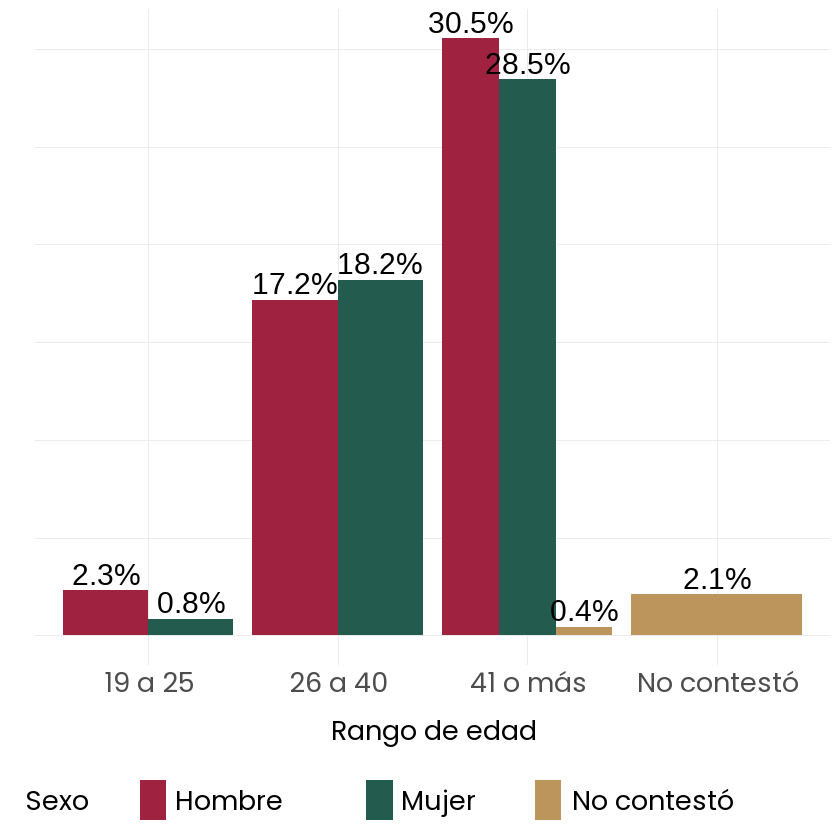

In [36]:
#Sexo y edad
encuesta%>%
group_by(i_a_8_cual_es_su_sexo,i_a_7_su_edad_en_que_rango_entra)%>%
summarise(n=n())%>%
ungroup()%>%
mutate(percentage=n/sum(n)*100)%>%

#Remplazar blancos por "No contestó"
mutate(
    #Mayúscula la primera letra
i_a_8_cual_es_su_sexo=stringr::str_to_title(i_a_8_cual_es_su_sexo),
    i_a_7_su_edad_en_que_rango_entra=case_when(i_a_7_su_edad_en_que_rango_entra=="19 a 25 anos" ~ "19 a 25",
i_a_7_su_edad_en_que_rango_entra=="26 a 40 anos" ~ "26 a 40",
i_a_7_su_edad_en_que_rango_entra=="41 o mas anos" ~ "41 o más",
TRUE ~ i_a_7_su_edad_en_que_rango_entra),
    
    i_a_8_cual_es_su_sexo=case_when(i_a_8_cual_es_su_sexo=="" ~ "No contestó",
TRUE ~ i_a_8_cual_es_su_sexo),
i_a_7_su_edad_en_que_rango_entra=case_when(i_a_7_su_edad_en_que_rango_entra=="" ~ "No contestó",
TRUE ~ i_a_7_su_edad_en_que_rango_entra),


)%>%
ggplot(aes(x=i_a_7_su_edad_en_que_rango_entra,fill=i_a_8_cual_es_su_sexo,y=percentage))+
geom_bar(stat="identity",position="dodge")+
  geom_text(
    aes(label = paste0(round(percentage, 1), "%")),
    vjust = -0.3, size = 8, position = position_dodge(width = 0.9)
  ) +
scale_fill_manual("Sexo",values=paleta[1:3])+
labs(#title="Perfil de los encuestados",
      #  subtitle="(Porcentaje del total de encuestados)",
        x="Rango de edad",
        y="")+
theme_minimal()+
theme(legend.position="bottom",
text=element_text(family="pop"),
    axis.text.y = element_blank(),
    axis.text.x = element_text(size=20),
                  plot.title = element_text(size=40,face="bold"),
                    plot.subtitle = element_text(size=30,face="italic"),
    axis.title.x = element_text(size=20),
plot.caption = element_text(size=12,hjust=0),
legend.title=element_text(size=20),
legend.text=element_text(size=20)
)

ggsave(paste0(output_dir,"/graf1.png"),width=18,height=10,dpi=100, bg="white")

In [37]:
encuesta%>%
group_by(i_a_5_cual_es_su_nivel_academico)%>%
summarise(n=n())%>%
mutate(percentage=n/sum(n)*100)%>%
ungroup()%>%
#i_a_5_cual_es_su_nivel_academico con primera letra en mayúscula
mutate(i_a_5_cual_es_su_nivel_academico=stringr::str_to_title(i_a_5_cual_es_su_nivel_academico))%>%
#Reemplazar Carrera tecnica con Bachillerato por Carrera técnica
mutate(i_a_5_cual_es_su_nivel_academico=case_when(i_a_5_cual_es_su_nivel_academico=="Carrera Tecnica Con Bachillerato" ~ "Carrera Técnica",
    i_a_5_cual_es_su_nivel_academico=="Bachillerato, Preparatoria O Equivalente" ~ "Bachillerato",
    i_a_5_cual_es_su_nivel_academico=="" ~ "No Contestó",


TRUE ~ i_a_5_cual_es_su_nivel_academico))

i_a_5_cual_es_su_nivel_academico,n,percentage
<chr>,<int>,<dbl>
No Contestó,15,3.138075
Bachillerato,59,12.343096
Carrera Técnica,53,11.087866
Licenciatura,270,56.485356
Posgrado,63,13.179916
Primaria,1,0.209205
Secundaria,17,3.556485


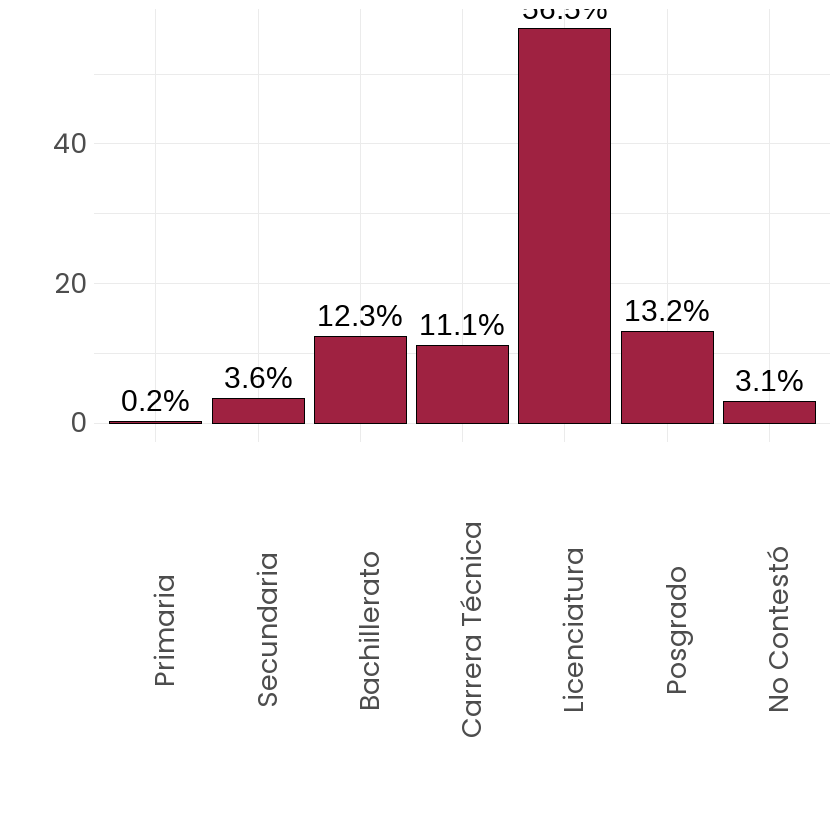

In [38]:
#Escolaridad

encuesta%>%
group_by(i_a_5_cual_es_su_nivel_academico)%>%
summarise(n=n())%>%
mutate(percentage=n/sum(n)*100)%>%
ungroup()%>%
#i_a_5_cual_es_su_nivel_academico con primera letra en mayúscula
mutate(i_a_5_cual_es_su_nivel_academico=str_trim(i_a_5_cual_es_su_nivel_academico))%>%
mutate(i_a_5_cual_es_su_nivel_academico=stringr::str_to_title(i_a_5_cual_es_su_nivel_academico))%>%

#Reemplazar Carrera tecnica con Bachillerato por Carrera técnica
mutate(i_a_5_cual_es_su_nivel_academico=case_when(i_a_5_cual_es_su_nivel_academico=="Carrera Tecnica Con Bachillerato" ~ "Carrera Técnica",
    i_a_5_cual_es_su_nivel_academico=="Bachillerato, Preparatoria O Equivalente" ~ "Bachillerato",
    i_a_5_cual_es_su_nivel_academico=="" ~ "No Contestó",
TRUE ~ i_a_5_cual_es_su_nivel_academico))%>%

#Eliminar espacios adelante y atrás

mutate(i_a_5_cual_es_su_nivel_academico=factor(i_a_5_cual_es_su_nivel_academico,levels=c("Primaria","Secundaria","Bachillerato","Carrera Técnica","Licenciatura","Posgrado","No Contestó")))%>%
#Remplazar blancos por "No contestó"

#Ordenar. Primero Primaria, después Secundaria, después Preparatoria, después Carrera técnica, después Licenciatura, después Posgrado y al final No contestó

ggplot(aes(x=i_a_5_cual_es_su_nivel_academico,y=percentage))+
geom_bar(stat="identity",color="black",fill=paleta[1])+
    geom_text(aes(label = paste0(round(percentage, 1), "%")), 
                hjust = 0.5, vjust=-0.5, size = 8)+
labs(#title="Escolaridad de los encuestados",
 #       subtitle="(Porcentaje del total de encuestados)",
  #      caption=paste0("Nota: Corte de información al ",Sys.Date(),"\n
#Fuente: Elaboración propia con datos de la encuesta de satisfacción del SITU"),
        x="",
        y="")+
theme_minimal()+
theme(legend.position="none",
text=element_text(family="pop"),
    axis.text.y = element_text(size=20),
    axis.text.x = element_text(size=20, angle = 90),
                  plot.title = element_text(size=40,face="bold"),
                    plot.subtitle = element_text(size=30,face="italic"),
plot.caption = element_text(size=12,hjust=0),
)


ggsave(paste0(output_dir,"/graf2.png"),width=20,height=10,dpi=100, bg="white")


In [39]:
facet_totals <- encuesta %>%
  filter(i_a_4_sector != "") %>%
mutate(
    i_a_4_sector = case_when(
      i_a_4_sector == "academia" ~ "Academia",
      i_a_4_sector == "privado" ~ "Privado",
      i_a_4_sector == "sociedad civil" ~ "Sociedad civil",
      i_a_4_sector == "publico" ~ "Público",
      TRUE ~ i_a_4_sector
    ))%>%
  group_by(i_a_4_sector, i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso) %>%
  summarise(n = n()) %>%
  group_by(i_a_4_sector) %>%
  summarise(total_n = sum(n))
facet_totals

`summarise()` has grouped output by 'i_a_4_sector'. You can override using the
`.groups` argument.


i_a_4_sector,total_n
<chr>,<int>
Academia,4
Privado,20
Público,436
Sociedad civil,3


`summarise()` has grouped output by 'i_a_4_sector'. You can override using the
`.groups` argument.


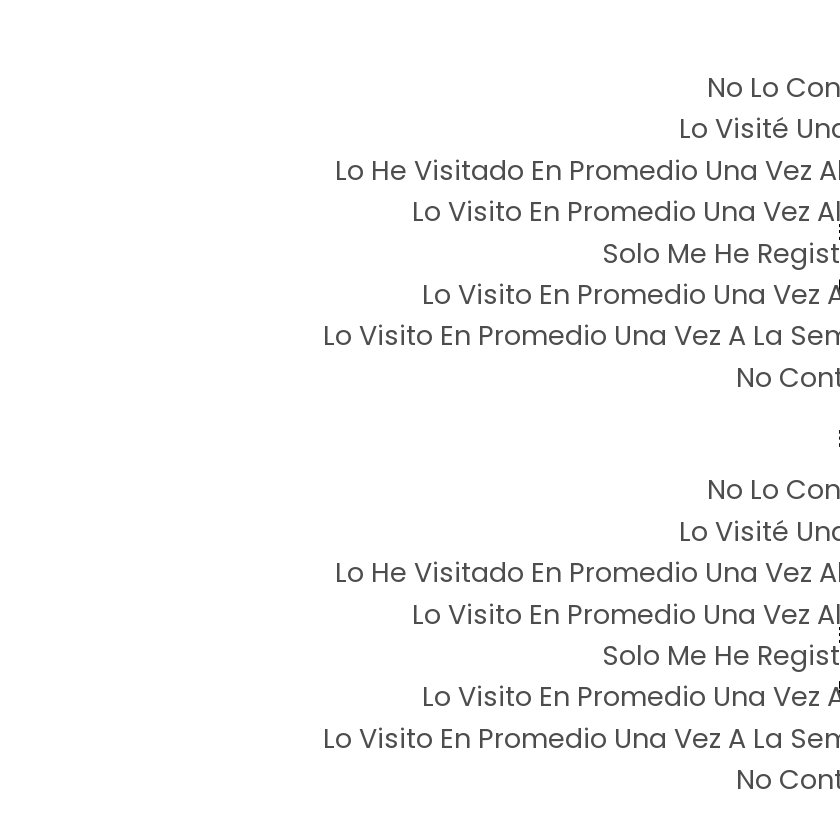

In [40]:
#Conocimiento y uso del SITU

encuesta%>%
group_by(i_a_4_sector,i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso)%>%
filter(i_a_4_sector!="")%>%
mutate(
    i_a_4_sector = case_when(
      i_a_4_sector == "academia" ~ "Academia",
      i_a_4_sector == "privado" ~ "Privado",
      i_a_4_sector == "sociedad civil" ~ "Sociedad civil",
      i_a_4_sector == "publico" ~ "Público",
      TRUE ~ i_a_4_sector
    )) %>%
mutate(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=str_trim(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso))%>%
mutate(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=str_to_title(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso))%>%
mutate(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=
case_when(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=="Lo Visite Una Vez" ~ "Lo Visité Una Vez",
TRUE ~ i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso))%>%
#Si la cadena contiene "Ano" sustituir esa palabra por "Año"
mutate(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=case_when(grepl("Ano",i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso) ~ gsub("Ano","Año",i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso),
TRUE ~ i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso))%>%

mutate(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=case_when(grepl("Dia",i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso) ~ gsub("Dia","Día",i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso),
TRUE ~ i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso))%>%

summarise(n=n())%>%
mutate(percentage=n/sum(n)*100)%>%

#Ordenar
#arrange(desc(percentage))%>%
ggplot(aes(x=reorder(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso,percentage),y=percentage))+
geom_bar(stat="identity",color="black",fill=paleta[1])+
  scale_y_continuous(limits = c(0, 60), expand = c(0, 0))+
coord_flip()+

  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            hjust = -0.1, size = 8) +
  facet_wrap(~i_a_4_sector)+
    geom_text(data = facet_totals, aes(x = 5, y = 50, label = paste("Total de 
encuestados:", total_n)), 
            hjust = 1.1, vjust = 1.1, size = 8, color = "black", inherit.aes = FALSE,fontface="bold")+
labs(#title="Conocimiento y uso del SITU",
     #subtitle="(Porcentaje)",
     #caption=paste0("Nota: Corte de información al ",Sys.Date(),"\n
#Fuente: Elaboración propia con datos de la encuesta de satisfacción del SITU"),
     x="",
     y="")+
theme_minimal()+
theme(legend.position="none", 
text=element_text(family="pop"),
    axis.text.y = element_text(size=20),
    axis.text.x = element_blank(),
        strip.text = element_text(size = 18, face = "bold"), 
                  plot.title = element_text(size=20,face="bold"),
                    plot.subtitle = element_text(size=15,face="italic"),
plot.caption = element_text(size=12,hjust=0),


)
ggsave(paste0(output_dir,"/graf9.png"),width=32,height=10,dpi=100, bg="white")

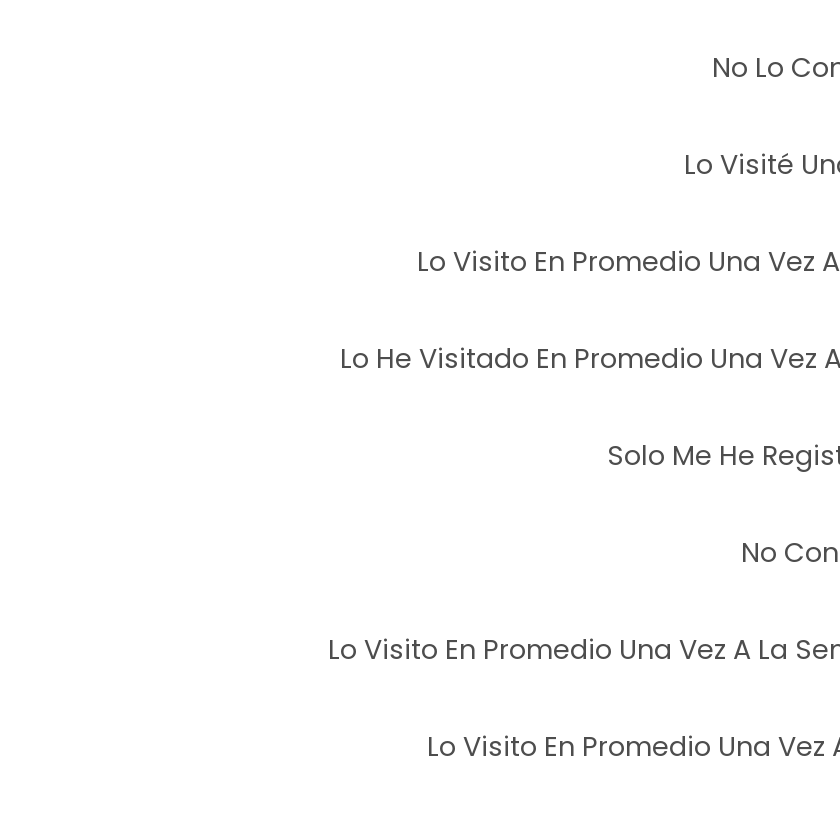

In [41]:

encuesta%>%
group_by(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso)%>%
mutate(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=str_trim(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso))%>%
mutate(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=str_to_title(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso))%>%
mutate(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=
case_when(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=="Lo Visite Una Vez" ~ "Lo Visité Una Vez",
TRUE ~ i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso))%>%
#Si la cadena contiene "Ano" sustituir esa palabra por "Año"
mutate(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=case_when(grepl("Ano",i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso) ~ gsub("Ano","Año",i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso),
TRUE ~ i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso))%>%

mutate(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso=case_when(grepl("Dia",i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso) ~ gsub("Dia","Día",i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso),
TRUE ~ i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso))%>%

summarise(n=n())%>%
mutate(percentage=n/sum(n)*100)%>%
#Ordenar
#arrange(desc(percentage))%>%
ggplot(aes(x=reorder(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso,percentage),y=percentage))+
geom_bar(stat="identity",color="black",fill=paleta[1])+
coord_flip()+
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            hjust = -0.1, size = 8) +
labs(#title="Conocimiento y uso del SITU",
     #subtitle="(Porcentaje)",
     #caption=paste0("Nota: Corte de información al ",Sys.Date(),"\n
#Fuente: Elaboración propia con datos de la encuesta de satisfacción del SITU"),
     x="",
     y="")+
theme_minimal()+
theme(legend.position="none", 
text=element_text(family="pop"),
    axis.text.y = element_text(size=20),
    axis.text.x = element_blank(),
                  plot.title = element_text(size=20,face="bold"),
                    plot.subtitle = element_text(size=15,face="italic"),
plot.caption = element_text(size=12,hjust=0),


)
ggsave(paste0(output_dir,"/graf3.png"),width=27,height=10,dpi=100, bg="white")

### Análisis con los registros de las personas que conocen el SITU

In [45]:
unique(encuesta$i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso)

[1] "lo visito en promedio una vez al dia"     
[2] "lo visito en promedio una vez al mes"     
[3] "lo visite una vez"                        
[4] "no lo conozco"                            
[5] "solo me he registrado"                    
[6] "lo he visitado en promedio una vez al ano"
[7] "lo visito en promedio una vez a la semana"
[8] "no contesto"

In [46]:
relevante<-encuesta%>%
#Filtrar aquellos que no lo conocen
filter(i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso!="no lo conozco" &
            i_a_9_cual_es_el_rango_del_uso_que_le_da_al_situ_considere_la_opcion_mas_aproximada_a_su_caso!="no contestó")

#Registros con los que se trabajará
print(paste0("Número de registros relevantes: ",nrow(relevante)))

[1] "Número de registros relevantes: 236"


In [70]:
relevante%>%
mutate(
    #Mayúscula la primera letra
i_a_8_cual_es_su_sexo=stringr::str_to_title(i_a_8_cual_es_su_sexo),
    i_a_7_su_edad_en_que_rango_entra=case_when(i_a_7_su_edad_en_que_rango_entra=="19 a 25 anos" ~ "19 a 25",
i_a_7_su_edad_en_que_rango_entra=="26 a 40 anos" ~ "26 a 40",
i_a_7_su_edad_en_que_rango_entra=="41 o mas anos" ~ "41 o más",
TRUE ~ i_a_7_su_edad_en_que_rango_entra),
    
    i_a_8_cual_es_su_sexo=case_when(i_a_8_cual_es_su_sexo=="" ~ "No contestó",
TRUE ~ i_a_8_cual_es_su_sexo),
i_a_7_su_edad_en_que_rango_entra=case_when(i_a_7_su_edad_en_que_rango_entra=="" ~ "No contestó",
TRUE ~ i_a_7_su_edad_en_que_rango_entra),


)%>%
mutate(i_a_5_cual_es_su_nivel_academico=str_trim(i_a_5_cual_es_su_nivel_academico))%>%
mutate(i_a_5_cual_es_su_nivel_academico=stringr::str_to_title(i_a_5_cual_es_su_nivel_academico))%>%

#Reemplazar Carrera tecnica con Bachillerato por Carrera técnica
mutate(i_a_5_cual_es_su_nivel_academico=case_when(i_a_5_cual_es_su_nivel_academico=="Carrera Tecnica Con Bachillerato" ~ "Carrera Técnica",
    i_a_5_cual_es_su_nivel_academico=="Bachillerato, Preparatoria O Equivalente" ~ "Bachillerato",
    i_a_5_cual_es_su_nivel_academico=="" ~ "No Contestó",
TRUE ~ i_a_5_cual_es_su_nivel_academico))%>%

#Eliminar espacios adelante y atrás

mutate(i_a_5_cual_es_su_nivel_academico=factor(i_a_5_cual_es_su_nivel_academico,levels=c("Primaria","Secundaria","Bachillerato","Carrera Técnica","Licenciatura","Posgrado","No Contestó")))%>%
group_by(i_a_7_su_edad_en_que_rango_entra,
         
         )%>%
summarise(n=n())%>%
mutate(i_a_7_su_edad_en_que_rango_entra=case_when(i_a_7_su_edad_en_que_rango_entra==""~"No contestó",
TRUE ~ i_a_7_su_edad_en_que_rango_entra))%>%
filter(i_a_7_su_edad_en_que_rango_entra!="No contestó")%>%
ungroup()%>%
mutate(percentage=n/sum(n)*100)

i_a_7_su_edad_en_que_rango_entra,n,percentage
<chr>,<int>,<dbl>
19 a 25,8,3.539823
26 a 40,100,44.247788
41 o más,118,52.212389


`summarise()` has grouped output by 'i_a_7_su_edad_en_que_rango_entra'. You can
override using the `.groups` argument.


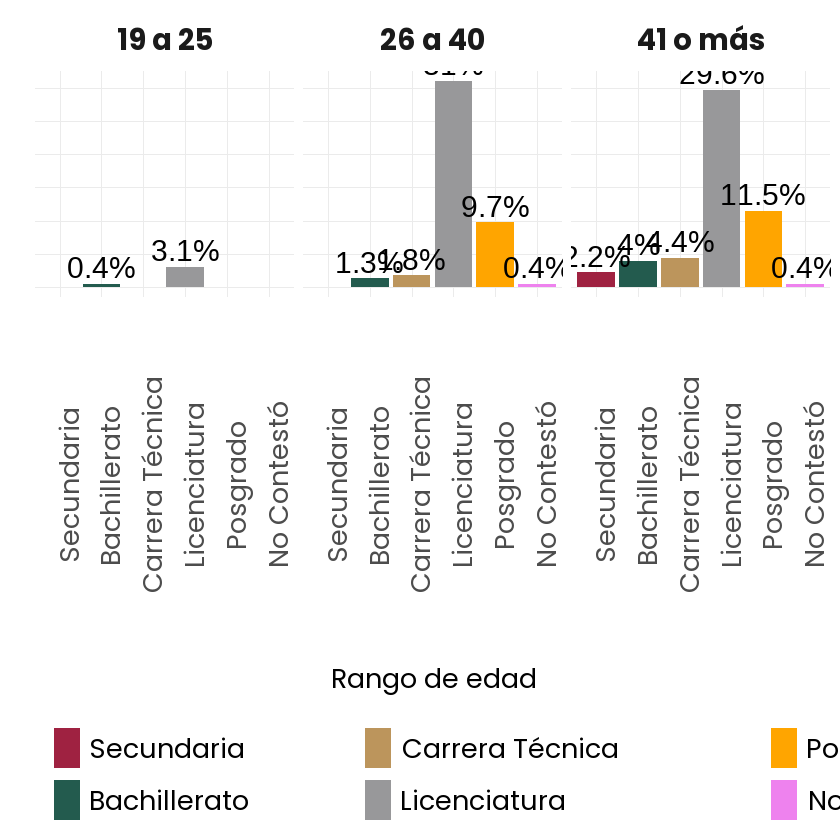

In [69]:
#Edad

relevante%>%
mutate(
    #Mayúscula la primera letra
i_a_8_cual_es_su_sexo=stringr::str_to_title(i_a_8_cual_es_su_sexo),
    i_a_7_su_edad_en_que_rango_entra=case_when(i_a_7_su_edad_en_que_rango_entra=="19 a 25 anos" ~ "19 a 25",
i_a_7_su_edad_en_que_rango_entra=="26 a 40 anos" ~ "26 a 40",
i_a_7_su_edad_en_que_rango_entra=="41 o mas anos" ~ "41 o más",
TRUE ~ i_a_7_su_edad_en_que_rango_entra),
    
    i_a_8_cual_es_su_sexo=case_when(i_a_8_cual_es_su_sexo=="" ~ "No contestó",
TRUE ~ i_a_8_cual_es_su_sexo),
i_a_7_su_edad_en_que_rango_entra=case_when(i_a_7_su_edad_en_que_rango_entra=="" ~ "No contestó",
TRUE ~ i_a_7_su_edad_en_que_rango_entra),


)%>%
mutate(i_a_5_cual_es_su_nivel_academico=str_trim(i_a_5_cual_es_su_nivel_academico))%>%
mutate(i_a_5_cual_es_su_nivel_academico=stringr::str_to_title(i_a_5_cual_es_su_nivel_academico))%>%

#Reemplazar Carrera tecnica con Bachillerato por Carrera técnica
mutate(i_a_5_cual_es_su_nivel_academico=case_when(i_a_5_cual_es_su_nivel_academico=="Carrera Tecnica Con Bachillerato" ~ "Carrera Técnica",
    i_a_5_cual_es_su_nivel_academico=="Bachillerato, Preparatoria O Equivalente" ~ "Bachillerato",
    i_a_5_cual_es_su_nivel_academico=="" ~ "No Contestó",
TRUE ~ i_a_5_cual_es_su_nivel_academico))%>%

#Eliminar espacios adelante y atrás

mutate(i_a_5_cual_es_su_nivel_academico=factor(i_a_5_cual_es_su_nivel_academico,levels=c("Primaria","Secundaria","Bachillerato","Carrera Técnica","Licenciatura","Posgrado","No Contestó")))%>%
group_by(i_a_7_su_edad_en_que_rango_entra,
         i_a_5_cual_es_su_nivel_academico
         )%>%
summarise(n=n())%>%
mutate(i_a_7_su_edad_en_que_rango_entra=case_when(i_a_7_su_edad_en_que_rango_entra==""~"No contestó",
TRUE ~ i_a_7_su_edad_en_que_rango_entra))%>%
filter(i_a_7_su_edad_en_que_rango_entra!="No contestó")%>%
ungroup()%>%
mutate(percentage=n/sum(n)*100)%>%
ggplot(aes(x=i_a_5_cual_es_su_nivel_academico,fill=i_a_5_cual_es_su_nivel_academico,y=percentage))+
geom_bar(stat="identity",position="dodge")+
    geom_text(
    aes(label = paste0(round(percentage, 1), "%")),
    vjust = -0.3, size = 8, position = position_dodge(width = 0.9)
    ) +
scale_fill_manual("Escolaridad",values=paleta)+
labs(#title="Perfil de los encuestados",
      #  subtitle="(Porcentaje del total de encuestados)",
        x="Rango de edad",
        y="")+
theme_minimal()+
facet_wrap(~i_a_7_su_edad_en_que_rango_entra)+
theme(legend.position="bottom",
text=element_text(family="pop"),
    axis.text.y = element_blank(),
    strip.text = element_text(size = 22, face = "bold"),
    axis.text.x = element_text(size=20, angle = 90),
                  plot.title = element_text(size=40,face="bold"),
                    plot.subtitle = element_text(size=30,face="italic"),
    axis.title.x = element_text(size=20),
plot.caption = element_text(size=12,hjust=0),
legend.title=element_text(size=20),
legend.text=element_text(size=20)
)

ggsave(paste0(output_dir,"/graf10.png"),width=20,height=10,dpi=100, bg="white")


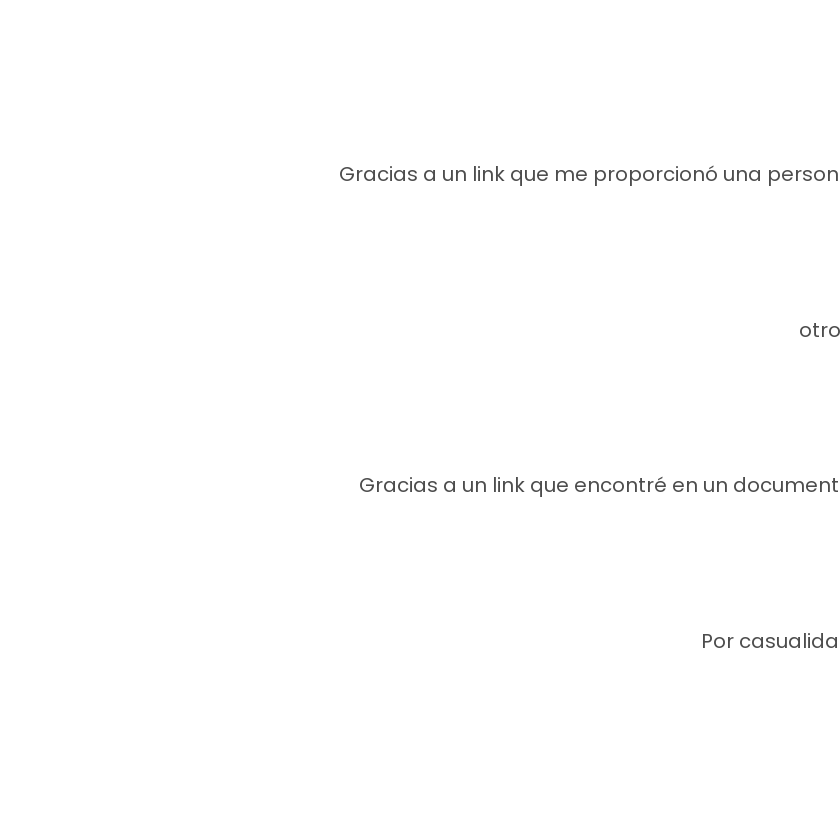

In [47]:
#Cómo llegó al sitio web

relevante%>%
#Dejar gracias a un link que me proporciono una persona, gracias a un link que encontré en un documento y por casualidad. Los demás en categoría otros
mutate(i_b_1_como_llego_al_sitio_web_del_situ=case_when(i_b_1_como_llego_al_sitio_web_del_situ=="gracias a un link que me proporciono una persona" ~ "Gracias a un link que me proporcionó una persona",    
i_b_1_como_llego_al_sitio_web_del_situ=="gracias a un link que encontre en un documento" ~ "Gracias a un link que encontré en un documento",
i_b_1_como_llego_al_sitio_web_del_situ=="por casualidad" ~ "Por casualidad",
TRUE ~ "otros"))%>%
group_by(i_b_1_como_llego_al_sitio_web_del_situ)%>%
summarise(n=n())%>%
mutate(percentage=n/sum(n)*100)%>%
#Ordenar
#arrange(desc(percentage))%>%
ggplot(aes(x=reorder(i_b_1_como_llego_al_sitio_web_del_situ,percentage),y=percentage))+
geom_bar(stat="identity",color="black",fill=paleta[1])+
coord_flip()+
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            hjust = -0.1, size = 5) +
labs(title="¿Cómo llegó al SITU?",
     subtitle="(Porcentaje de aquellas personas que conocen el sistema)",
     caption=paste0("Nota: Corte de información al ",Sys.Date(),"\n
Fuente: Elaboración propia con datos de la encuesta de satisfacción del SITU"),
     x="",
     y="")+
theme_minimal()+
theme(legend.position="none", 
text=element_text(family="pop"),
    axis.text.y = element_text(size=15),
    axis.text.x = element_blank(),
                  plot.title = element_text(size=20,face="bold"),
                    plot.subtitle = element_text(size=15,face="italic"),
plot.caption = element_text(size=12,hjust=0),


)
ggsave(paste0(output_dir,"/graf4.png"),width=18,height=10,dpi=100, bg="white")

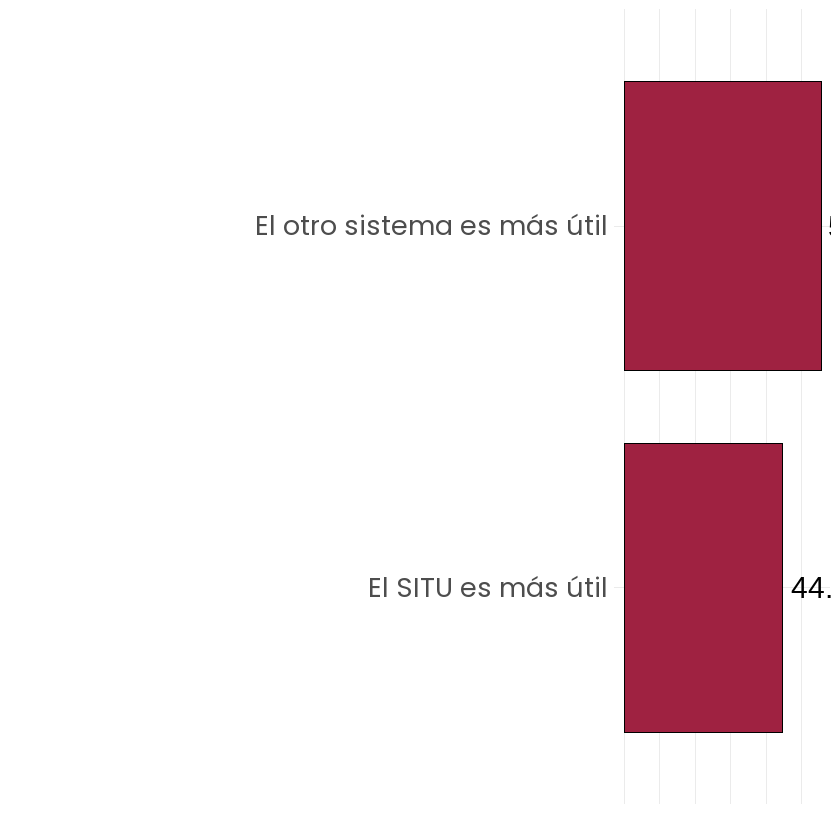

In [48]:
relevante%>%
#Filtrar aquellos que conocen otros sistemas
filter(i_b_3_conoce_otros_sistemas_que_tengan_funciones_similares_al_situ_si_si_cuales!=""
       & i_b_4_comparado_con_el_sistema_que_mejor_conoce_de_los_mencionados_como_consideraria_que_es_el_situ_con_respecto_a_ese!="")%>%
mutate(i_b_4_comparado_con_el_sistema_que_mejor_conoce_de_los_mencionados_como_consideraria_que_es_el_situ_con_respecto_a_ese=
case_when(i_b_4_comparado_con_el_sistema_que_mejor_conoce_de_los_mencionados_como_consideraria_que_es_el_situ_con_respecto_a_ese %in% c(
    "el otro sistema es mas util que el situ", "el otro sistema es mucho mas util que el situ") ~ "El otro sistema es más útil",
    TRUE ~ "El SITU es más útil"))%>%
group_by(i_b_4_comparado_con_el_sistema_que_mejor_conoce_de_los_mencionados_como_consideraria_que_es_el_situ_con_respecto_a_ese)%>%
summarise(n=n())%>%
mutate(percentage=n/sum(n)*100)%>%
ggplot(aes(x=reorder(i_b_4_comparado_con_el_sistema_que_mejor_conoce_de_los_mencionados_como_consideraria_que_es_el_situ_con_respecto_a_ese,percentage),y=percentage))+
geom_bar(stat="identity",color="black",fill=paleta[1], width=0.8
         )+
coord_flip()+
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            hjust = -0.1, size = 8) +
labs(#title="Comparación del SITU versus otros sistemas",
     #subtitle="(Porcentaje de aquellas personas que conocen el SITU y otros sistemas)",
     #caption=paste0("Nota: Corte de información al ",Sys.Date(),"\n
#Fuente: Elaboración propia con datos de la encuesta de satisfacción del SITU"),
     x="",
     y="")+
theme_minimal()+
theme(legend.position="none", 
text=element_text(family="pop"),
    axis.text.y = element_text(size=20),
    axis.text.x = element_blank(),
                  plot.title = element_text(size=20,face="bold"),
                    plot.subtitle = element_text(size=15,face="italic"),
plot.caption = element_text(size=12,hjust=0),


)
ggsave(paste0(output_dir,"/graf5.png"),width=18,height=10,dpi=100, bg="white")

In [78]:
spanish_stopwords<-stopwords("es")

In [79]:
unique(relevante$i_b_3_conoce_otros_sistemas_que_tengan_funciones_similares_al_situ_si_si_cuales)

[1] "(snit) y (sigren)"                                                                                                                                                                                                               
 [2] "no"                                                                                                                                                                                                                              
 [3] "gema de conahcyt, sire de mejoredu, sig de conabio"                                                                                                                                                                              
 [4] "no cknosco"                                                                                                                                                                                                                      
 [5] "si"                                                                                                                                                                                                                              
 [6] ""                                                                                                                                                                                                                                
 [7] "mapa digital de inegi"                                                                                                                                                                                                           
 [8] "gits"                                                                                                                                                                                                                            
 [9] "mapa digital de mexico"                                                                                                                                                                                                          
[10] "el de inegi el de indicadores sociodemograficos y economicos, esnieg."                                                                                                                                                           
[11] "inegi, ruv, conavio"                                                                                                                                                                                                             
[12] "observatorio nacional de lesiones"                                                                                                                                                                                               
[13] "conabio, inegi, idea ig-unam, siatl"                                                                                                                                                                                             
[14] "mxsig en linea, idefor de conafor, geoportal de conabio"                                                                                                                                                                         
[15] "ciudad mx - seduvi - cdmx"                                                                                                                                                                                                       
[16] "si, visualizador inegi"                                                                                                                                                                                                          
[17] "el mapa digital de inegi, portal de conabio, el geoportal binacional istar"                                                                                                                                                      
[18] "siore"                                             

In [80]:
otros_sistemas <- c("inegi", "mapa digital", "gema conahcyt", "conabio", "phina ran", "no conozco", "no","sistemas municipales", "igecem","gits", 
                    "siore","siap", "siatl", "sniiv", "mejoredu","siore", "idea", "insus", "semarnat", "ruv")
i_b_3_responses <- unique(relevante$i_b_3_conoce_otros_sistemas_que_tengan_funciones_similares_al_situ_si_si_cuales)
i_b_3_responses <- i_b_3_responses[!grepl("\\b(no|nada|desconozco|ninguno)\\b", tolower(i_b_3_responses))]


# Split responses by common delimiters and unlist
i_b_3_responses <- unlist(lapply(i_b_3_responses, function(resp) {
  if (grepl("[,/]", resp)) {
    strsplit(resp, split = "[,/]", fixed = FALSE)[[1]]
  } else {
    resp
  }
}))

# Trim whitespace and filter out empty strings
i_b_3_responses <- trimws(i_b_3_responses)
i_b_3_responses <- i_b_3_responses[i_b_3_responses != ""]
i_b_3_responses <- gsub("[[:punct:]]", "", i_b_3_responses)


# Create a custom list of stop words (including Spanish)
custom_stopwords <- c(spanish_stopwords, "geoportal", "de", "con", "al", "del", "en", "la", "el", "sig", "portal", "plataforma", "visor")

# Function to remove stop words and specific terms
remove_stopwords <- function(text) {
  words <- unlist(strsplit(text, " "))
  words_filtered <- words[!tolower(words) %in% custom_stopwords]
  paste(words_filtered, collapse = " ")
}

# Apply the function to clean responses
i_b_3_responses <- sapply(i_b_3_responses, remove_stopwords)

# Calculate similarity scores
similarity_results <- data.frame()

for (response in i_b_3_responses) {
  for (system in otros_sistemas) {
    distance <- stringdist(tolower(response), tolower(system), method = "lv")
    similarity_score <- 1 - (distance / max(nchar(response), nchar(system)))
    similarity_results <- rbind(similarity_results,
                                data.frame(response = response,
                                           system = system,
                                           similarity_score = similarity_score))
  }
}



In [81]:
#Dejar el score más alto para cada respuesta
similarity_results <- similarity_results %>%
  group_by(response) %>%
  filter(similarity_score == max(similarity_score)) %>%
  ungroup()%>%
#Dejar el primer registro
  distinct(response, .keep_all = TRUE)%>%
#Si similarity_score es menor a 0.6, entonces system es "otros"
mutate(system=case_when(similarity_score<0.55 ~ "otros",
                        TRUE ~ system))%>%
#Filtrar si system es "no conozco"
filter(system!="no conozco")%>%
filter(system!="")

similarity_results

response,system,similarity_score
<chr>,<chr>,<dbl>
snit sigren,otros,0.3636364
gema conahcyt,gema conahcyt,1.0000000
sire mejoredu,mejoredu,0.6153846
conabio,conabio,1.0000000
si,otros,0.5000000
mapa digital inegi,mapa digital,0.6666667
gits,gits,1.0000000
mapa digital mexico,mapa digital,0.6315789
inegi indicadores sociodemograficos economicos,otros,0.1956522


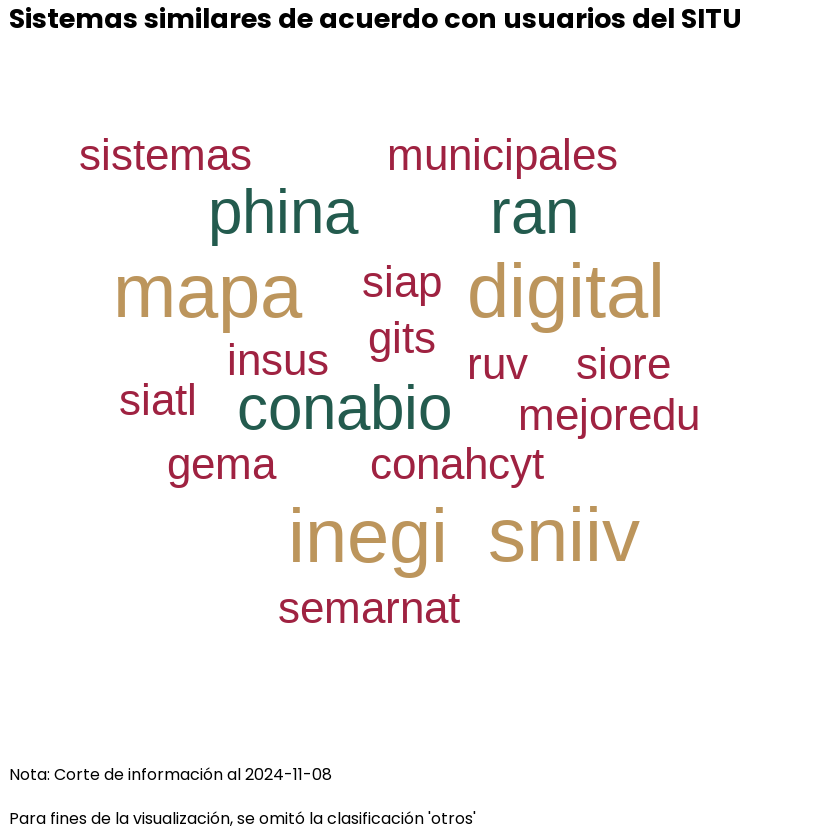

In [82]:
#Hacer wordcloud
similarity_results%>%
filter(system!="otros")%>%
count(system)%>%
ggplot(aes(label=system,size=n, color=n))+
geom_text_wordcloud(shape = "diamond")+
  scale_size_area(max_size = 20) +  
  scale_color_gradientn(colours = paleta[1:3])+
theme_minimal()+

labs(title="Sistemas similares de acuerdo con usuarios del SITU",
     caption=paste0("Nota: Corte de información al ",Sys.Date(),"\n
Para fines de la visualización, se omitó la clasificación 'otros'"))+
theme(text=element_text(family="pop"),
      plot.title = element_text(size=20,face="bold"),
      plot.caption = element_text(size=12,hjust=0),
      plot.subtitle = element_text(size=15,face="italic"),
      legend.position="none")


ggsave(paste0(output_dir,"/graf6.png"),width=8,height=6,dpi=100, bg="white")

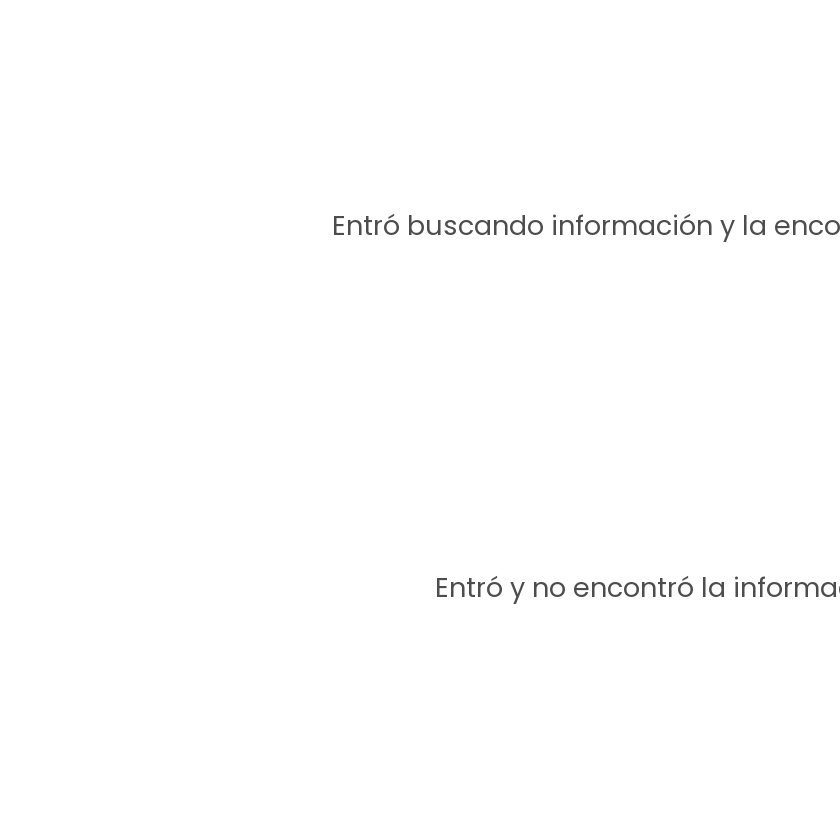

In [83]:
relevante %>%
  mutate(
    i_c_1_que_caso_se_parece_mas_al_de_usted = case_when(
      i_c_1_que_caso_se_parece_mas_al_de_usted == "entre al situ buscando informacion y no la encontre" ~ "Entró y no encontró la información",
      i_c_1_que_caso_se_parece_mas_al_de_usted %in% c(
        "entre al situ buscando informacion y si la encontre pero no la descargue o no la puede descargar o visualizar",
        "entre al situ buscando informacion y si la encontre y la descargue o pude visualizar o descargarer pero no me sirvio ",
        "entre al situ buscando informacion y si no la encontre",
        "entre al situ buscando informacion, la encontre y pude descargar o visualizar y me sirvio"
      ) ~ "Entró buscando información y la encontró",
      TRUE ~ "otros"
    )
  ) %>%
#Eliminar otros
    filter(i_c_1_que_caso_se_parece_mas_al_de_usted!="otros")%>%
  group_by(i_c_1_que_caso_se_parece_mas_al_de_usted) %>%
  summarise(n = n()) %>%
  mutate(percentage = n / sum(n) * 100)%>%
    ggplot(aes(x = reorder(i_c_1_que_caso_se_parece_mas_al_de_usted, percentage), y = percentage)) +
    geom_bar(stat = "identity", color = "black", fill = paleta[1]) +
    coord_flip() +
    geom_text(aes(label = paste0(round(percentage, 1), "%")), hjust = -0.1, size = 8) +
    labs(
      #title = "Utilidad de la información en el SITU",
      #subtitle = "(Porcentaje de aquellas personas que conocen el SITU y han buscado información)",
      #caption = paste0("Nota: Corte de información al ", Sys.Date(), "\n
#Fuente: Elaboración propia con datos de la encuesta de satisfacción del SITU"),
        x = "",
        y = ""
        ) +
        theme_minimal() +
        theme(
        legend.position = "none",
        text = element_text(family = "pop"),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_blank(),
        plot.title = element_text(size = 20, face = "bold"),
        plot.subtitle = element_text(size = 15, face = "italic"),
        plot.caption = element_text(size = 12, hjust = 0)
        )
    
    ggsave(paste0(output_dir, "/graf7.png"), width = 20, height = 10, dpi = 100, bg = "white")

In [84]:
relevante%>%
#Filtrar aquellos que han utilizado módulos
filter(i_c_7_que_modulos_conoce_del_situ_no_importa_que_este_conocimiento_sea_muy_pequeno_solo_haberlo_visto_o_saber_de_su_existencia!="")%>%
separate_rows(i_c_7_que_modulos_conoce_del_situ_no_importa_que_este_conocimiento_sea_muy_pequeno_solo_haberlo_visto_o_saber_de_su_existencia, sep = ",")%>%
select(i_c_7_que_modulos_conoce_del_situ_no_importa_que_este_conocimiento_sea_muy_pequeno_solo_haberlo_visto_o_saber_de_su_existencia)%>%
group_by(i_c_7_que_modulos_conoce_del_situ_no_importa_que_este_conocimiento_sea_muy_pequeno_solo_haberlo_visto_o_saber_de_su_existencia)%>%
summarise(n=n())%>%
mutate(percentage=n/sum(n)*100)%>%
select(!n)

i_c_7_que_modulos_conoce_del_situ_no_importa_que_este_conocimiento_sea_muy_pequeno_solo_haberlo_visto_o_saber_de_su_existencia,percentage
<chr>,<dbl>
modulo de analisis geografico,13.203463
modulo de consulta documental,11.255411
modulo de estadistica e indicadores,10.822511
modulo de movilidad,8.441558
modulo de analisis geografico,9.740260
modulo de consulta documental,11.688312
modulo de estadistica e indicadores,2.813853
modulo de movilidad,8.008658
modulo de planeacion municipal,24.025974


In [85]:
#Módulos
conocimiento<-relevante%>%
#Filtrar aquellos que han utilizado módulos
filter(i_c_7_que_modulos_conoce_del_situ_no_importa_que_este_conocimiento_sea_muy_pequeno_solo_haberlo_visto_o_saber_de_su_existencia!="")%>%
separate_rows(i_c_7_que_modulos_conoce_del_situ_no_importa_que_este_conocimiento_sea_muy_pequeno_solo_haberlo_visto_o_saber_de_su_existencia, sep = ",")%>%
select(i_c_7_que_modulos_conoce_del_situ_no_importa_que_este_conocimiento_sea_muy_pequeno_solo_haberlo_visto_o_saber_de_su_existencia)%>%
mutate_all(str_trim)%>%
group_by(i_c_7_que_modulos_conoce_del_situ_no_importa_que_este_conocimiento_sea_muy_pequeno_solo_haberlo_visto_o_saber_de_su_existencia)%>%
summarise(n=n())%>%
mutate(percentage=n/sum(n)*100)%>%
select(!n)




utilizacion<-relevante%>%
#Filtrar aquellos que han utilizado módulos
filter(i_c_8_que_modulos_del_situ_ha_consultado_aunque_esta_consulta_hay_sido_muy_simple!="")%>%
separate_rows(i_c_8_que_modulos_del_situ_ha_consultado_aunque_esta_consulta_hay_sido_muy_simple, sep = ",")%>%
select(i_c_8_que_modulos_del_situ_ha_consultado_aunque_esta_consulta_hay_sido_muy_simple)%>%
mutate_all(str_trim)%>%
group_by(i_c_8_que_modulos_del_situ_ha_consultado_aunque_esta_consulta_hay_sido_muy_simple)%>%
summarise(n=n())%>%
mutate(percentage=n/sum(n)*100)%>%
select(!n)

#Juntar
modulos<-left_join(conocimiento,utilizacion,by=c("i_c_7_que_modulos_conoce_del_situ_no_importa_que_este_conocimiento_sea_muy_pequeno_solo_haberlo_visto_o_saber_de_su_existencia"="i_c_8_que_modulos_del_situ_ha_consultado_aunque_esta_consulta_hay_sido_muy_simple"))%>%
rename("Módulo"=i_c_7_que_modulos_conoce_del_situ_no_importa_que_este_conocimiento_sea_muy_pequeno_solo_haberlo_visto_o_saber_de_su_existencia,
"Conocimiento"="percentage.x",
"Utilización"="percentage.y")%>%
#Ordenar de acuerdo a la utilización
arrange(desc(Utilización))%>%
##Eliminar "modulo de " en todasd las respuestas
mutate(Módulo=gsub("modulo de ","",Módulo))%>%
mutate(
    Módulo=case_when(Módulo=="planeacion municipal" ~ "Planeación municipal",
Módulo=="analisis geografico" ~ "Análisis geográfico",
Módulo=="consulta documental" ~ "Consulta documental",
Módulo=="movilidad" ~ "Movilidad",
Módulo=="estadistica e indicadores" ~ "Estadística e indicadores"))%>%
mutate(Conocimiento=round(Conocimiento,1),
Utilización=round(Utilización,1))


modulos%>%
crea_tabla("Conocimiento y utlización de módulos del SITU",
              "(Porcentaje)",
              " ",
              paste0(output_dir,"/tabla01.png"))

ERROR: Error in s$close(): attempt to apply non-function


In [26]:
#Sistema

##Navegación

planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
select(ii_a_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc)%>%
#Promedio como número
mutate(ii_a_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc=as.numeric(ii_a_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
#Promedio
summarise(promedio=round(mean(ii_a_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc),2))%>%
mutate(mod="Planeación municipal")


movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
select(ii_b_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc)%>%
#Promedio como número
mutate(ii_b_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc=as.numeric(ii_b_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
#Promedio
summarise(promedio=round(mean(ii_b_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc),2))



movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
select(ii_b_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc)%>%
#Promedio como número
mutate(ii_b_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc=as.numeric(ii_b_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
#Promedio
summarise(promedio=round(mean(ii_b_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc),2))%>%
mutate(mod="Movilidad")

geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
select(ii_c_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc)%>%
#Promedio como número
mutate(ii_c_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc=as.numeric(ii_c_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
#Promedio
summarise(promedio=round(mean(ii_c_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc),2))%>%
mutate(mod="Análisis geográfico")

estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
select(ii_d_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc)%>%
#Promedio como número
mutate(ii_d_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc=as.numeric(ii_d_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
#Promedio
summarise(promedio=round(mean(ii_d_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc),2))%>%
mutate(mod="Estadística e indicadores")




documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
select(ii_e_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc)%>%
#Promedio como número
mutate(ii_e_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc=as.numeric(ii_e_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc))%>%
#Promedio
summarise(promedio=round(mean(ii_e_b_1_navegacion_que_tan_facil_puedo_desplazarme_entre_ventanas_menus_botones_etc),2))%>%
mutate(mod="Consulta documental")


#Pegar
navegacion<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)




#Estabilidad

planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_b_2_estabilidad_que_tan_estable_es_el_sistema))%>%
select(ii_a_b_2_estabilidad_que_tan_estable_es_el_sistema)%>%
#Promedio como número
mutate(ii_a_b_2_estabilidad_que_tan_estable_es_el_sistema=as.numeric(ii_a_b_2_estabilidad_que_tan_estable_es_el_sistema))%>%
#Promedio
summarise(promedio=round(mean(ii_a_b_2_estabilidad_que_tan_estable_es_el_sistema),2))%>%
mutate(mod="Planeación municipal")


movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_b_2_estabilidad_que_tan_estable_es_el_sistema))%>%
select(ii_b_b_2_estabilidad_que_tan_estable_es_el_sistema)%>%
#Promedio como número
mutate(ii_b_b_2_estabilidad_que_tan_estable_es_el_sistema=as.numeric(ii_b_b_2_estabilidad_que_tan_estable_es_el_sistema))%>%
#Promedio
summarise(promedio=round(mean(ii_b_b_2_estabilidad_que_tan_estable_es_el_sistema),2))%>%
mutate(mod="Movilidad")




geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_b_2_estabilidad_que_tan_estable_es_el_sistema))%>%
select(ii_c_b_2_estabilidad_que_tan_estable_es_el_sistema)%>%
#Promedio como número
mutate(ii_c_b_2_estabilidad_que_tan_estable_es_el_sistema=as.numeric(ii_c_b_2_estabilidad_que_tan_estable_es_el_sistema))%>%
#Promedio
summarise(promedio=round(mean(ii_c_b_2_estabilidad_que_tan_estable_es_el_sistema),2))%>%
mutate(mod="Análisis geográfico")



estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_b_2_estabilidad_que_tan_estable_es_el_sistema))%>%
select(ii_d_b_2_estabilidad_que_tan_estable_es_el_sistema)%>%
#Promedio como número
mutate(ii_d_b_2_estabilidad_que_tan_estable_es_el_sistema=as.numeric(ii_d_b_2_estabilidad_que_tan_estable_es_el_sistema))%>%
#Promedio
summarise(promedio=round(mean(ii_d_b_2_estabilidad_que_tan_estable_es_el_sistema),2))%>%
mutate(mod="Estadística e indicadores")



documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_b_2_estabilidad_que_tan_estable_es_el_sistema))%>%
select(ii_e_b_2_estabilidad_que_tan_estable_es_el_sistema)%>%
#Promedio como número
mutate(ii_e_b_2_estabilidad_que_tan_estable_es_el_sistema=as.numeric(ii_e_b_2_estabilidad_que_tan_estable_es_el_sistema))%>%
#Promedio
summarise(promedio=round(mean(ii_e_b_2_estabilidad_que_tan_estable_es_el_sistema),2))%>%
mutate(mod="Consulta documental")



estabilidad<-rbind(planeacion_mun,movilidad, geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)



#Rapidez


planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes))%>%
select(ii_a_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes)%>%
#Promedio como número
mutate(ii_a_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes=as.numeric(ii_a_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes))%>%
#Promedio
summarise(promedio=round(mean(ii_a_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes),2))%>%
mutate(mod="Planeación municipal")



movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes))%>%
select(ii_b_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes)%>%
#Promedio como número
mutate(ii_b_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes=as.numeric(ii_b_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes))%>%
#Promedio
summarise(promedio=round(mean(ii_b_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes))%>%
select(ii_c_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes)%>%
#Promedio como número
mutate(ii_c_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes=as.numeric(ii_c_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes))%>%
#Promedio
summarise(promedio=round(mean(ii_c_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes),2))%>%
mutate(mod="Análisis geográfico")



estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes))%>%
select(ii_d_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes)%>%
#Promedio como número
mutate(ii_d_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes=as.numeric(ii_d_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes))%>%
#Promedio
summarise(promedio=round(mean(ii_d_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes),2))%>%
mutate(mod="Estadística e indicadores")

documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes))%>%
select(ii_e_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes)%>%
#Promedio como número
mutate(ii_e_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes=as.numeric(ii_e_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes))%>%
#Promedio
summarise(promedio=round(mean(ii_e_b_3_rapidez_que_tan_rapido_responde_el_situ_a_solicitudes),2))%>%
mutate(mod="Consulta documental")

rapidez<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)


#Seguridad


planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_b_4_seguridad_que_tan_seguro_es_el_situ))%>%
select(ii_a_b_4_seguridad_que_tan_seguro_es_el_situ)%>%
#Promedio como número
mutate(ii_a_b_4_seguridad_que_tan_seguro_es_el_situ=as.numeric(ii_a_b_4_seguridad_que_tan_seguro_es_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_a_b_4_seguridad_que_tan_seguro_es_el_situ),2))%>%
mutate(mod="Planeación municipal")


movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_b_4_seguridad_que_tan_seguro_es_el_situ))%>%
select(ii_b_b_4_seguridad_que_tan_seguro_es_el_situ)%>%
#Promedio como número
mutate(ii_b_b_4_seguridad_que_tan_seguro_es_el_situ=as.numeric(ii_b_b_4_seguridad_que_tan_seguro_es_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_b_b_4_seguridad_que_tan_seguro_es_el_situ),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_b_4_seguridad_que_tan_seguro_es_el_situ))%>%
select(ii_c_b_4_seguridad_que_tan_seguro_es_el_situ)%>%
#Promedio como número
mutate(ii_c_b_4_seguridad_que_tan_seguro_es_el_situ=as.numeric(ii_c_b_4_seguridad_que_tan_seguro_es_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_c_b_4_seguridad_que_tan_seguro_es_el_situ),2))%>%
mutate(mod="Análisis geográfico")



estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_b_4_seguridad_que_tan_seguro_es_el_situ))%>%
select(ii_d_b_4_seguridad_que_tan_seguro_es_el_situ)%>%
#Promedio como número
mutate(ii_d_b_4_seguridad_que_tan_seguro_es_el_situ=as.numeric(ii_d_b_4_seguridad_que_tan_seguro_es_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_d_b_4_seguridad_que_tan_seguro_es_el_situ),2))%>%
mutate(mod="Estadística e indicadores")

documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_b_4_seguridad_que_tan_seguro_es_el_situ))%>%
select(ii_e_b_4_seguridad_que_tan_seguro_es_el_situ)%>%
#Promedio como número
mutate(ii_e_b_4_seguridad_que_tan_seguro_es_el_situ=as.numeric(ii_e_b_4_seguridad_que_tan_seguro_es_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_e_b_4_seguridad_que_tan_seguro_es_el_situ),2))%>%
mutate(mod="Consulta documental")


seguridad<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)


#Compatibilidad


planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos))%>%
select(ii_a_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos)%>%
#Promedio como número
mutate(ii_a_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos=as.numeric(ii_a_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos))%>%
#Promedio
summarise(promedio=round(mean(ii_a_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos),2))%>%
mutate(mod="Planeación municipal")




movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos))%>%
select(ii_b_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos)%>%
#Promedio como número
mutate(ii_b_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos=as.numeric(ii_b_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos))%>%
#Promedio
summarise(promedio=round(mean(ii_b_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos))%>%
select(ii_c_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos)%>%
#Promedio como número
mutate(ii_c_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos=as.numeric(ii_c_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos))%>%
#Promedio
summarise(promedio=round(mean(ii_c_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos),2))%>%
mutate(mod="Análisis geográfico")



estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos))%>%
select(ii_d_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos)%>%
#Promedio como número
mutate(ii_d_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos=as.numeric(ii_d_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos))%>%
#Promedio
summarise(promedio=round(mean(ii_d_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos),2))%>%
mutate(mod="Estadística e indicadores")

documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos))%>%
select(ii_e_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos)%>%
#Promedio como número
mutate(ii_e_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos=as.numeric(ii_e_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos))%>%
#Promedio
summarise(promedio=round(mean(ii_e_b_5_compatibilidad_que_tanto_convive_el_situ_y_sus_productos_con_otros_sistemas_y_sus_productos),2))%>%
mutate(mod="Consulta documental")

compatibilidad<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)

#Tolerancia a fallos


planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar))%>%
select(ii_a_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar)%>%
#Promedio como número
mutate(ii_a_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar=as.numeric(ii_a_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar))%>%
#Promedio
summarise(promedio=round(mean(ii_a_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar),2))%>%
mutate(mod="Planeación municipal")




movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_b_6_tolerancia_a_fallos_que_tanto_puedo_equivocarme_sin_que_el_sistema_me_deje_de_responder))%>%
select(ii_b_b_6_tolerancia_a_fallos_que_tanto_puedo_equivocarme_sin_que_el_sistema_me_deje_de_responder)%>%
#Promedio como número
mutate(ii_b_b_6_tolerancia_a_fallos_que_tanto_puedo_equivocarme_sin_que_el_sistema_me_deje_de_responder=as.numeric(ii_b_b_6_tolerancia_a_fallos_que_tanto_puedo_equivocarme_sin_que_el_sistema_me_deje_de_responder))%>%
#Promedio
summarise(promedio=round(mean(ii_b_b_6_tolerancia_a_fallos_que_tanto_puedo_equivocarme_sin_que_el_sistema_me_deje_de_responder),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar))%>%
select(ii_c_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar)%>%
#Promedio como número
mutate(ii_c_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar=as.numeric(ii_c_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar))%>%
#Promedio
summarise(promedio=round(mean(ii_c_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar),2))%>%
mutate(mod="Análisis geográfico")



estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar))%>%
select(ii_d_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar)%>%
#Promedio como número
mutate(ii_d_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar=as.numeric(ii_d_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar))%>%
#Promedio
summarise(promedio=round(mean(ii_d_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar),2))%>%
mutate(mod="Estadística e indicadores")

documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar))%>%
select(ii_e_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar)%>%
#Promedio como número
mutate(ii_e_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar=as.numeric(ii_e_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar))%>%
#Promedio
summarise(promedio=round(mean(ii_e_b_6_tolerancia_a_fallos_que_tanto_puede_fallar_sin_que_sea_dejar_de_navegar),2))%>%
mutate(mod="Consulta documental")




tolerancia<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)

#Pegar la tabla de navegación y estabilidad
tabla_uno<-left_join(navegacion,estabilidad,by="mod")
tabla_dos<-left_join(tabla_uno,rapidez,by="mod")
tabla_tres<-left_join(tabla_dos,seguridad,by="mod")
tabla_cuatro<-left_join(tabla_tres,compatibilidad,by="mod")
tabla_sistema<-left_join(tabla_cuatro,tolerancia,by="mod")

tabla_sistema


mod,promedio.x,promedio.y,promedio.x.x,promedio.y.y,promedio.x.x.x,promedio.y.y.y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Planeación municipal,2.65,2.63,2.48,2.90,2.70,2.52
Movilidad,2.73,2.78,2.66,2.85,2.70,2.56
Análisis geográfico,2.63,2.59,2.52,2.83,2.70,2.52
Estadística e indicadores,2.54,2.54,2.56,2.71,2.53,2.57
Consulta documental,2.73,2.64,2.68,2.81,2.65,2.51


In [27]:
sistema<-tabla_sistema%>%
rename("Navegación"=promedio.x,
"Estabilidad"=promedio.y,
"Rapidez"=promedio.x.x,
"Seguridad"=promedio.y.y,
"Compatibilidad"=promedio.x.x.x,
"Tolerancia a fallos"=promedio.y.y.y)%>%
    
#Nueva columna con "Promedio general"
mutate("Promedio general"=round(rowMeans(.[2:3]),2))%>%
#Ordenar de acuerdo al promedio general
arrange(desc(`Promedio general`))%>%
openxlsx::write.xlsx(paste0(output_dir,"/tabla02.xlsx"))
# crea_tabla("Aspectos relacionados con el sistema en general",
#               "(Promedio. Calificaciones de 1 a 4, donde 1 es muy malo y 4 es muy bueno)",
#               " ",
#               paste0(output_dir,"/tabla02.png"))
# 
# sistema



# **Aspectos relacionados con el diseño**

In [28]:
##Amigabilidad

planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_uso))%>%
select(ii_a_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_uso)%>%
#Promedio como número
mutate(ii_a_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_uso=as.numeric(ii_a_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_uso))%>%
#Promedio
summarise(promedio=round(mean(ii_a_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_uso),2))%>%
mutate(mod="Planeación municipal")



movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_uso))%>%
select(ii_b_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_uso)%>%
#Promedio como número
mutate(ii_b_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_uso=as.numeric(ii_b_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_uso))%>%
#Promedio
summarise(promedio=round(mean(ii_b_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_uso),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_c_1_amigabilidad_que_tan_facil_se_entiende_la_interfaz_de_uso))%>%
              
select(ii_c_c_1_amigabilidad_que_tan_facil_se_entiende_la_interfaz_de_uso)%>%
#Promedio como número
mutate(ii_c_c_1_amigabilidad_que_tan_facil_se_entiende_la_interfaz_de_uso=as.numeric(ii_c_c_1_amigabilidad_que_tan_facil_se_entiende_la_interfaz_de_uso))%>%
#Promedio
summarise(promedio=round(mean(ii_c_c_1_amigabilidad_que_tan_facil_se_entiende_la_interfaz_de_uso),2))%>%
mutate(mod="Análisis geográfico")


estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_usuario))%>%
select(ii_d_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_usuario)%>%
#Promedio como número
mutate(ii_d_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_usuario=as.numeric(ii_d_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_usuario))%>%
#Promedio
summarise(promedio=round(mean(ii_d_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_usuario),2))%>%
mutate(mod="Estadística e indicadores")



documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_usuario))%>%
select(ii_e_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_usuario)%>%
#Promedio como número
mutate(ii_e_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_usuario=as.numeric(ii_e_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_usuario))%>%
#Promedio
summarise(promedio=round(mean(ii_e_c_1_amigabilidad_que_tan_facil_entiende_la_interfaz_de_usuario),2))%>%
mutate(mod="Consulta documental")


amicabilidad<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)




#rapidez de aprendizaje


planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ))%>%
select(ii_a_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ)%>%
#Promedio como número
mutate(ii_a_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ=as.numeric(ii_a_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_a_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ),2))%>%
mutate(mod="Planeación municipal")



movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ))%>%
select(ii_b_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ)%>%
#Promedio como número
mutate(ii_b_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ=as.numeric(ii_b_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_b_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ))%>%
select(ii_c_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ)%>%
#Promedio como número
mutate(ii_c_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ=as.numeric(ii_c_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_c_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ),2))%>%
mutate(mod="Análisis geográfico")



estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ))%>%
select(ii_d_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ)%>%
#Promedio como número
mutate(ii_d_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ=as.numeric(ii_d_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_d_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ),2))%>%
mutate(mod="Estadística e indicadores")



documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ))%>%
select(ii_e_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ)%>%
#Promedio como número
mutate(ii_e_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ=as.numeric(ii_e_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_e_c_2_rapidez_de_aprendizaje_que_tan_rapido_se_aprende_a_usar_el_situ),2))%>%
mutate(mod="Consulta documental")


rapidez_aprendizaje<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)



#Accesibilidad


planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad))%>%
select(ii_a_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad)%>%
#Promedio como número
mutate(ii_a_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad=as.numeric(ii_a_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad))%>%
#Promedio
summarise(promedio=round(mean(ii_a_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad),2))%>%
mutate(mod="Planeación municipal")



movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad))%>%
select(ii_b_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad)%>%
#Promedio como número
mutate(ii_b_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad=as.numeric(ii_b_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad))%>%
#Promedio
summarise(promedio=round(mean(ii_b_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad))%>%
select(ii_c_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad)%>%
#Promedio como número
mutate(ii_c_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad=as.numeric(ii_c_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad))%>%
#Promedio
summarise(promedio=round(mean(ii_c_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad),2))%>%
mutate(mod="Análisis geográfico")



estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad))%>%
select(ii_d_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad)%>%
#Promedio como número
mutate(ii_d_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad=as.numeric(ii_d_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad))%>%
#Promedio
summarise(promedio=round(mean(ii_d_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad),2))%>%
mutate(mod="Estadística e indicadores")

documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad))%>%
select(ii_e_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad)%>%
#Promedio como número
mutate(ii_e_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad=as.numeric(ii_e_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad))%>%
#Promedio
summarise(promedio=round(mean(ii_e_c_3_accesibilidad_que_tan_accesible_es_para_personas_con_discapacidad),2))%>%
mutate(mod="Consulta documental")


accesibilidad<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)



###Personalización


planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso))%>%
select(ii_a_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso)%>%
#Promedio como número
mutate(ii_a_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso=as.numeric(ii_a_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso))%>%
#Promedio
summarise(promedio=round(mean(ii_a_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso),2))%>%
mutate(mod="Planeación municipal")



movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso))%>%
select(ii_b_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso)%>%
#Promedio como número
mutate(ii_b_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso=as.numeric(ii_b_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso))%>%
#Promedio
summarise(promedio=round(mean(ii_b_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso))%>%
select(ii_c_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso)%>%
#Promedio como número
mutate(ii_c_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso=as.numeric(ii_c_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso))%>%
#Promedio
summarise(promedio=round(mean(ii_c_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso),2))%>%
mutate(mod="Análisis geográfico")


estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso))%>%
select(ii_d_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso)%>%
#Promedio como número
mutate(ii_d_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso=as.numeric(ii_d_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso))%>%
#Promedio
summarise(promedio=round(mean(ii_d_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso),2))%>%
mutate(mod="Estadística e indicadores")



documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso))%>%
select(ii_e_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso)%>%
#Promedio como número
mutate(ii_e_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso=as.numeric(ii_e_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso))%>%
#Promedio
summarise(promedio=round(mean(ii_e_c_4_personalizacion_que_tanto_lo_puedo_adaptar_a_mi_forma_de_uso),2))%>%
mutate(mod="Consulta documental")


personalizacion<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)

##Experiencia del usuario


planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo))%>%
select(ii_a_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo)%>%
#Promedio como número
mutate(ii_a_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo=as.numeric(ii_a_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo))%>%
#Promedio
summarise(promedio=round(mean(ii_a_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo),2))%>%
mutate(mod="Planeación municipal")



movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo))%>%
select(ii_b_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo)%>%
#Promedio como número
mutate(ii_b_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo=as.numeric(ii_b_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo))%>%
#Promedio
summarise(promedio=round(mean(ii_b_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo),2))%>%
mutate(mod="Movilidad")



geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo))%>%
select(ii_c_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo)%>%
#Promedio como número
mutate(ii_c_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo=as.numeric(ii_c_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo))%>%
#Promedio
summarise(promedio=round(mean(ii_c_c_5_ux_experiencia_de_uso_que_tan_bien_se_siente_usarlo),2))%>%
mutate(mod="Análisis geográfico")



estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_c_5_ux_experiencia_de_usuario_que_tan_bien_se_siente_usarlo))%>%  
select(ii_d_c_5_ux_experiencia_de_usuario_que_tan_bien_se_siente_usarlo)%>%
#Promedio como número
mutate(ii_d_c_5_ux_experiencia_de_usuario_que_tan_bien_se_siente_usarlo=as.numeric(ii_d_c_5_ux_experiencia_de_usuario_que_tan_bien_se_siente_usarlo))%>%
#Promedio
summarise(promedio=round(mean(ii_d_c_5_ux_experiencia_de_usuario_que_tan_bien_se_siente_usarlo),2))%>%
mutate(mod="Estadística e indicadores")


documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_c_5_ux_experiencia_de_usuario_que_tan_bien_se_siente_usarlo))%>%
select(ii_e_c_5_ux_experiencia_de_usuario_que_tan_bien_se_siente_usarlo)%>%
#Promedio como número
mutate(ii_e_c_5_ux_experiencia_de_usuario_que_tan_bien_se_siente_usarlo=as.numeric(ii_e_c_5_ux_experiencia_de_usuario_que_tan_bien_se_siente_usarlo))%>%
#Promedio
summarise(promedio=round(mean(ii_e_c_5_ux_experiencia_de_usuario_que_tan_bien_se_siente_usarlo),2))%>%
mutate(mod="Consulta documental")


ux<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)

#Pegar tablas

tabla_uno<-left_join(amicabilidad,rapidez_aprendizaje,by="mod")
tabla_dos<-left_join(tabla_uno,accesibilidad,by="mod")
tabla_tres<-left_join(tabla_dos,personalizacion,by="mod")
tabla_diseno<-left_join(tabla_tres,ux,by="mod")

tabla_diseno





mod,promedio.x,promedio.y,promedio.x.x,promedio.y.y,promedio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Planeación municipal,2.82,2.76,2.63,2.53,2.69
Movilidad,2.78,2.77,2.65,2.62,2.75
Análisis geográfico,2.70,2.68,2.54,2.62,2.66
Estadística e indicadores,2.66,2.58,2.60,2.57,2.59
Consulta documental,2.77,2.77,2.62,2.59,2.74


In [29]:
diseno<-tabla_diseno%>%
rename(
    "Módulo"=mod,
    "Amigabilidad"=promedio.x,
"Rapidez de aprendizaje"=promedio.y,
"Accesibilidad"=promedio.x.x,
"Personalización"=promedio.y.y,
"Experiencia de usario"=promedio)%>%
    
#Nueva columna con "Promedio general"
mutate("Promedio general"=round(rowMeans(.[2:3]),2))%>%
#Ordenar de acuerdo al promedio general
arrange(desc(`Promedio general`))%>%
#Salvar a excel
 openxlsx::write.xlsx(.,paste0(output_dir,"/tabla03.xlsx"),overwrite=TRUE)#%>%
# crea_tabla("Aspectos relacionados con el diseño del sistema",
#               "(Promedio. Calificaciones de 1 a 4, donde 1 es muy malo y 4 es muy bueno)",
#               " ",
#               paste0(output_dir,"/tabla03.png"))
# 
# diseno

# **Aspectos relacionados con la información**

In [30]:
#Claridad de la información


##Planeación municipal
planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ))%>%
select(ii_a_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ)%>%
#Promedio como número
mutate(ii_a_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ=as.numeric(ii_a_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_a_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ),2))%>%
mutate(mod="Planeación municipal")



movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ))%>%
select(ii_b_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ)%>%
#Promedio como número
mutate(ii_b_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ=as.numeric(ii_b_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_b_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ),2))%>%
mutate(mod="Movilidad")




geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ))%>%
select(ii_c_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ)%>%
#Promedio como número
mutate(ii_c_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ=as.numeric(ii_c_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_c_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ),2))%>%
mutate(mod="Análisis geográfico")



estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ))%>%  
select(ii_d_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ)%>%
#Promedio como número
mutate(ii_d_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ=as.numeric(ii_d_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_d_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ),2))%>%
mutate(mod="Estadística e indicadores")



documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ))%>%
select(ii_e_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ)%>%
#Promedio como número
mutate(ii_e_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ=as.numeric(ii_e_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_e_d_1_claridad_que_tan_clara_es_la_informacion_que_presenta_el_situ),2))%>%
mutate(mod="Consulta documental")


claridad<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)



##utilidad

##Planeación municipal
planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada))%>%
select(ii_a_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada)%>%
#Promedio como número
mutate(ii_a_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada=as.numeric(ii_a_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada))%>%
#Promedio
summarise(promedio=round(mean(ii_a_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada),2))%>%
mutate(mod="Planeación municipal")


movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada))%>%
select(ii_b_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada)%>%
#Promedio como número
mutate(ii_b_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada=as.numeric(ii_b_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada))%>%
#Promedio
summarise(promedio=round(mean(ii_b_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada))%>%
select(ii_c_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada)%>%
#Promedio como número
mutate(ii_c_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada=as.numeric(ii_c_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada))%>%
#Promedio
summarise(promedio=round(mean(ii_c_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada),2))%>%
mutate(mod="Análisis geográfico")




estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada))%>%  
select(ii_d_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada)%>%
#Promedio como número
mutate(ii_d_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada=as.numeric(ii_d_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada))%>%
#Promedio
summarise(promedio=round(mean(ii_d_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada),2))%>%
mutate(mod="Estadística e indicadores")



documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada))%>%
select(ii_e_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada)%>%
#Promedio como número
mutate(ii_e_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada=as.numeric(ii_e_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada))%>%
#Promedio
summarise(promedio=round(mean(ii_e_d_2_utilidad_que_tan_util_es_la_informacion_para_servir_a_los_fines_para_los_que_fue_buscada),2))%>%
mutate(mod="Consulta documental")


utilidad<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)

##Precisión


planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes))%>%
select(ii_a_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes)%>%
#Promedio como número
mutate(ii_a_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes=as.numeric(ii_a_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes))%>%
#Promedio
summarise(promedio=round(mean(ii_a_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes),2))%>%
mutate(mod="Planeación municipal")



movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes))%>%
select(ii_b_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes)%>%
#Promedio como número
mutate(ii_b_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes=as.numeric(ii_b_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes))%>%
#Promedio
summarise(promedio=round(mean(ii_b_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes),2))%>%
mutate(mod="Movilidad")



geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes))%>%
select(ii_c_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes)%>%
#Promedio como número
mutate(ii_c_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes=as.numeric(ii_c_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes))%>%
#Promedio
summarise(promedio=round(mean(ii_c_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes),2))%>%
mutate(mod="Análisis geográfico")



estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes))%>%  
select(ii_d_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes)%>%
#Promedio como número
mutate(ii_d_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes=as.numeric(ii_d_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes))%>%
#Promedio
summarise(promedio=round(mean(ii_d_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes),2))%>%
mutate(mod="Estadística e indicadores")



documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes))%>%
select(ii_e_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes)%>%
#Promedio como número
mutate(ii_e_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes=as.numeric(ii_e_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes))%>%
#Promedio
summarise(promedio=round(mean(ii_e_d_3_precision_que_tanto_la_informacion_coincide_con_las_fuentes),2))%>%
mutate(mod="Consulta documental")



precision<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)



##Versatilidad



planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad))%>%
select(ii_a_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad)%>%
#Promedio como número
mutate(ii_a_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad=as.numeric(ii_a_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad))%>%
#Promedio
summarise(promedio=round(mean(ii_a_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad),2))%>%
mutate(mod="Planeación municipal")


movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mis_necesidades))%>%
select(ii_b_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mis_necesidades)%>%
#Promedio como número
mutate(ii_b_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mis_necesidades=as.numeric(ii_b_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mis_necesidades))%>%
#Promedio
summarise(promedio=round(mean(ii_b_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mis_necesidades),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad))%>%
select(ii_c_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad)%>%
#Promedio como número
mutate(ii_c_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad=as.numeric(ii_c_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad))%>%
#Promedio
summarise(promedio=round(mean(ii_c_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad),2))%>%
mutate(mod="Análisis geográfico")


estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad))%>%
select(ii_d_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad)%>%
#Promedio como número
mutate(ii_d_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad=as.numeric(ii_d_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad))%>%
#Promedio
summarise(promedio=round(mean(ii_d_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad),2))%>%
mutate(mod="Estadística e indicadores")


documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad))%>%
select(ii_e_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad)%>%
#Promedio como número
mutate(ii_e_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad=as.numeric(ii_e_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad))%>%
#Promedio
summarise(promedio=round(mean(ii_e_d_4_versatilidad_que_tanto_puedo_adaptar_la_informacion_a_mi_necesidad),2))%>%
mutate(mod="Consulta documental")


versatilidad<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)


#Completitud



planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera))%>%
select(ii_a_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera)%>%
#Promedio como número
mutate(ii_a_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera=as.numeric(ii_a_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera))%>%
#Promedio
summarise(promedio=round(mean(ii_a_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera),2))%>%
mutate(mod="Planeación municipal")


movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera))%>%
select(ii_b_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera)%>%
#Promedio como número
mutate(ii_b_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera=as.numeric(ii_b_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera))%>%
#Promedio
summarise(promedio=round(mean(ii_b_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera))%>%
select(ii_c_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera)%>%
#Promedio como número
mutate(ii_c_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera=as.numeric(ii_c_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera))%>%
#Promedio
summarise(promedio=round(mean(ii_c_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera),2))%>%
mutate(mod="Análisis geográfico")


estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera))%>%
select(ii_d_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera)%>%
#Promedio como número
mutate(ii_d_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera=as.numeric(ii_d_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera))%>%
#Promedio
summarise(promedio=round(mean(ii_d_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera),2))%>%
mutate(mod="Estadística e indicadores")


documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera))%>%
select(ii_e_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera)%>%
#Promedio como número
mutate(ii_e_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera=as.numeric(ii_e_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera))%>%
#Promedio
summarise(promedio=round(mean(ii_e_d_5_completitud_que_tanta_informacion_presenta_el_situ_con_respecto_a_la_que_se_espera),2))%>%
mutate(mod="Consulta documental")


completitud<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)



#Georreferenciación

planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales))%>%
select(ii_a_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales)%>%
#Promedio como número
mutate(ii_a_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales=as.numeric(ii_a_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales))%>%
#Promedio
summarise(promedio=round(mean(ii_a_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales),2))%>%
mutate(mod="Planeación municipal")


movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales))%>%
select(ii_b_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales)%>%
#Promedio como número
mutate(ii_b_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales=as.numeric(ii_b_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales))%>%
#Promedio
summarise(promedio=round(mean(ii_b_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales))%>%
select(ii_c_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales)%>%
#Promedio como número
mutate(ii_c_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales=as.numeric(ii_c_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales))%>%
#Promedio
summarise(promedio=round(mean(ii_c_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales),2))%>%
mutate(mod="Análisis geográfico")


estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales))%>%
select(ii_d_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales)%>%
#Promedio como número
mutate(ii_d_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales=as.numeric(ii_d_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales))%>%
#Promedio
summarise(promedio=round(mean(ii_d_d_6_georreferenciacion_que_tanto_se_puede_presentar_la_informacion_espacialmente_en_mapas_o_con_referencias_espaciales),2))%>%
mutate(mod="Estadística e indicadores")

georreferenciacion<-rbind(planeacion_mun,movilidad,geografico,estadistica)%>%
#Reordenar columnas
select(mod,promedio)




#Actualización



planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta))%>%
select(ii_a_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta)%>%
#Promedio como número
mutate(ii_a_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta=as.numeric(ii_a_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta))%>%
#Promedio
summarise(promedio=round(mean(ii_a_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta),2))%>%
mutate(mod="Planeación municipal")


movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta))%>%
select(ii_b_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta)%>%
#Promedio como número
mutate(ii_b_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta=as.numeric(ii_b_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta))%>%
#Promedio
summarise(promedio=round(mean(ii_b_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta),2))%>%
mutate(mod="Movilidad")



geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta))%>%
select(ii_c_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta)%>%
#Promedio como número
mutate(ii_c_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta=as.numeric(ii_c_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta))%>%
#Promedio
summarise(promedio=round(mean(ii_c_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta),2))%>%
mutate(mod="Análisis geográfico")


estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta))%>%
select(ii_d_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta)%>%
#Promedio como número
mutate(ii_d_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta=as.numeric(ii_d_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta))%>%
#Promedio
summarise(promedio=round(mean(ii_d_d_7_actualizacion_que_tan_reciente_es_la_informacion_que_presenta),2))%>%
mutate(mod="Estadística e indicadores")


documental<-relevante%>%
#eliminar NA
filter(!is.na(ii_e_d_6_actualizacion_que_tan_reciente_es_la_informacion_que_presenta))%>%

select(ii_e_d_6_actualizacion_que_tan_reciente_es_la_informacion_que_presenta)%>%
#Promedio como número
mutate(ii_e_d_6_actualizacion_que_tan_reciente_es_la_informacion_que_presenta=as.numeric(ii_e_d_6_actualizacion_que_tan_reciente_es_la_informacion_que_presenta))%>%
#Promedio
summarise(promedio=round(mean(ii_e_d_6_actualizacion_que_tan_reciente_es_la_informacion_que_presenta),2))%>%
mutate(mod="Consulta documental")



actualizacion<-rbind(planeacion_mun,movilidad,geografico,estadistica,documental)%>%
#Reordenar columnas
select(mod,promedio)



##Interoperabilidad



planeacion_mun<-relevante%>%
#eliminar NA
filter(!is.na(ii_a_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ))%>%
select(ii_a_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ)%>%
#Promedio como número
mutate(ii_a_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ=as.numeric(ii_a_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_a_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ),2))%>%
mutate(mod="Planeación municipal")


movilidad<-relevante%>%
#eliminar NA
filter(!is.na(ii_b_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ))%>%
select(ii_b_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ)%>%
#Promedio como número
mutate(ii_b_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ=as.numeric(ii_b_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_b_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ),2))%>%
mutate(mod="Movilidad")


geografico<-relevante%>%
#eliminar NA
filter(!is.na(ii_c_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ))%>%
select(ii_c_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ)%>%
#Promedio como número
mutate(ii_c_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ=as.numeric(ii_c_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_c_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ),2))%>%
mutate(mod="Análisis geográfico")


estadistica<-relevante%>%
#eliminar NA
filter(!is.na(ii_d_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ))%>%
select(ii_d_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ)%>%
#Promedio como número
mutate(ii_d_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ=as.numeric(ii_d_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ))%>%
#Promedio
summarise(promedio=round(mean(ii_d_d_8_interoperabilidad_que_tanto_se_puede_utilizar_informacion_de_otro_sitio_o_por_el_contrario_la_de_otro_sitio_en_el_situ),2))%>%
mutate(mod="Estadística e indicadores")


interoperabilidad<-rbind(planeacion_mun,movilidad,geografico,estadistica)%>%
#Reordenar columnas
select(mod,promedio)


#Pegar tablas
tabla_informacion<-left_join(claridad,utilidad,by="mod")%>%
left_join(.,precision,by="mod")%>%
left_join(.,versatilidad,by="mod")%>%
left_join(.,completitud,by="mod")%>%
left_join(.,georreferenciacion,by="mod")%>%
left_join(.,actualizacion,by="mod")%>%
left_join(.,interoperabilidad,by="mod")

tabla_informacion





mod,promedio.x,promedio.y,promedio.x.x,promedio.y.y,promedio.x.x.x,promedio.y.y.y,promedio.x.x.x.x,promedio.y.y.y.y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Planeación municipal,2.78,2.81,2.85,2.73,2.68,2.75,2.72,2.68
Movilidad,2.77,2.75,2.80,2.78,2.68,2.79,2.74,2.69
Análisis geográfico,2.71,2.72,2.79,2.67,2.71,2.75,2.74,2.67
Estadística e indicadores,2.66,2.67,2.70,2.64,2.64,2.65,2.69,2.60
Consulta documental,2.75,2.81,2.78,2.74,2.66,NA,2.67,NA


In [31]:
#Tabla de información
t1<-tabla_informacion%>%

#Renombrar columnas
rename("Claridad"="promedio.x",
"Utilidad"="promedio.y",
"Precisión"="promedio.x.x",
"Versatilidad"="promedio.y.y",
"Completitud"="promedio.x.x.x",
"Georreferenciación"="promedio.y.y.y",
"Actualización"="promedio.x.x.x.x",
"Interoperabilidad"="promedio.y.y.y.y")%>%

mutate("Promedio general"=round(rowMeans(.[2:3]),2))%>%
#Ordenar de acuerdo al promedio general
arrange(desc(`Promedio general`))%>%
openxlsx::write.xlsx(paste0(output_dir, "/tabla04.xlsx"))
t1

A Workbook object.
 
Worksheets:
 Sheet 1: "Sheet 1"
 

 
 Worksheet write order: 1
 Active Sheet 1: "Sheet 1" 
	Position: 1


In [32]:
# crea_tabla(t1,
#            "Aspectos relacionados con la información contenida en el SITU",
#            "(Promedio. Calificaciones de 1 a 4, donde 1 es muy malo y 4 es muy bueno)",
#            "", paste0(output_dir, "/tabla04.png"))

In [33]:
recomendaciones<-relevante%>%
select(iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara)%>%
#Eliminar vacíos
filter(iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara!="")

print(nrow(recomendaciones))

[1] 152


In [34]:
#Qué quiere ver la gente en el situ
#recomendaciones
palabras_eliminar <- c(stopwords("es"), "deberia", "debe", "ser","seria","bueno","tiene","muchas","fallas","aprovechar","situ", "ahi","mostrar","ademas")
recomendaciones<-relevante%>%
select(iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara)%>%
#Eliminar vacíos
filter(iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara!="")

print(nrow(recomendaciones))


recomendaciones<-recomendaciones%>%
#Eliminar si contiene "no conozco"
filter(!grepl("no conozco",iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara))%>%
filter(!grepl("forbidden",iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara))%>%
filter(!grepl("desconozco",iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara))%>%
filter(!grepl("ninguna",iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara))%>%
filter(!grepl("encuesta",iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara))%>%
filter(!grepl("x",iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara))%>%
filter(!grepl("no lo abrio",iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara))%>%

#Contenido de iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara a minúsculas
mutate(iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara=tolower(iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara))%>%
#Eliminar espacios adelante y atrás
mutate(iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara=trimws(iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara))%>%
#Eliminar signos de puntuación con gsub
mutate(iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara=gsub("[[:punct:]]", "", iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara))%>%
#Eliminar stopwords
mutate(iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara = removeWords(iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara, palabras_eliminar))%>% 
unnest_tokens(trigram, iii_2_que_recomendaciones_daria_para_que_el_situ_mejorara, token = "ngrams", n = 2)%>%
#Eliminar NA
filter(!is.na(trigram))%>%
#Cambiar informacion mas por mas informacion
mutate(trigram=gsub("informacion mas","mas informacion",trigram))%>%
mutate(trigram=gsub("difusion medios","mayor difusion",trigram))%>%
mutate(trigram=gsub("mas difusion","mayor difusion",trigram))%>%
mutate(trigram=gsub("100 actualizada","informacion actualizada",trigram))%>%
mutate(trigram=gsub("actualizar mas","informacion actualizada",trigram))%>%
mutate(trigram=gsub("actualizacion informacion","informacion actualizada",trigram))%>%
mutate(trigram=gsub("actualizada contar","informacion actualizada",trigram))%>%
mutate(trigram=gsub("agradable vista","mejorar interfaz",trigram))%>%
#Si contiene la palabra "amigable" cambiar por "mas amigable"
mutate(trigram=gsub("amigable moderna","mas amigable",trigram))%>%


#Hacer conteo
#
count(trigram, sort = TRUE)%>%
#Hacer porcentaje
mutate(percentage = (n / sum(n))*100)



recomendaciones

[1] 152


trigram,n,percentage
<chr>,<int>,<dbl>
mayor difusion,9,1.6791045
mas informacion,6,1.1194030
informacion actualizada,5,0.9328358
mas intuitivo,4,0.7462687
mas rapido,4,0.7462687
mas amigable,3,0.5597015
mejorar interfaz,3,0.5597015
analisis geografico,2,0.3731343
apertura informacion,2,0.3731343


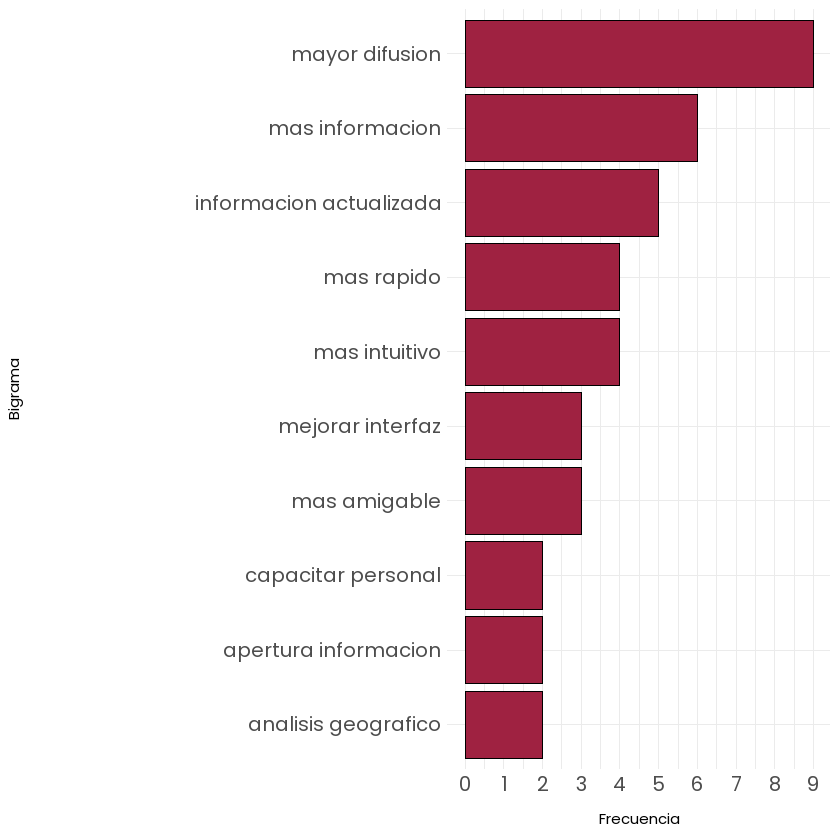

In [35]:
#Gráfica de barras

recomendaciones%>%
head(10)%>%

ggplot(aes(x=reorder(trigram,n),y=n))+
geom_bar(stat = "identity", color = "black", fill = paleta[1]) +
    coord_flip() +
    #geom_text(aes(label = paste0(round(percentage, 1), "%")), hjust = -0.1, size = 5) +
#Scale y en enteros
scale_y_continuous(breaks = seq(0, 10, 1)) +
    labs(
      #title = "Recomendaciones más mencionadas para mejorar el SITU",
      #subtitle = "(Porcentaje de aquellas personas que contestaron recomendaciones)",
      #caption = paste0(("Nota: Para fines de la visualización, se omitieron acentos.
       #                 Corte de información al "), Sys.Date(), "\n
#Fuente: Elaboración propia con datos de la encuesta de satisfacción del SITU"),
        x = "Bigrama",
        y = "Frecuencia"
        ) +
        theme_minimal() +
        theme(
        legend.position = "none",
        text = element_text(family = "pop"),
        axis.text.y = element_text(size = 15),
        axis.text.x = element_text(size = 15),
        plot.title = element_text(size = 20, face = "bold"),
        plot.subtitle = element_text(size = 15, face = "italic"),
        plot.caption = element_text(size = 12, hjust = 0)
        )
        
        
ggsave(paste0(output_dir,"/graf8.png"),width=18,height=10,dpi=100, bg="white")
